## Importing Modules and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import RobustScaler, StandardScaler

# To enable inline plotting of Matplotlib figures directly within the notebook
%matplotlib inline



## Understanding the data

The provided dataset is publicly available, and our initial step is to gather more information about it.
<br>
<br>
We understand that this pertains to a direct marketing campaign conducted by a banking institution, wherein clients were queried regarding their interest in subscribing to a bank term deposit. The campaign was executed through telephone calls, and in certain instances, multiple interactions with the same client were required to ascertain their decision.
<br>
<br>
**The classification goal is to predict whether the client will subscribe to a term deposit.**
<br>
<br>
However, before building a predictive model, we need to get to know the dataset better and eventually prepare it for machine learning.
<br>
<br>

| #  | Variable   | Description                                                                                                                                      | Type         | Categories                                                                                                                                                                     |
|----|:-----------|:------------------------------------------------------------------------------------------------------------------------------|:------------:|:--------------------------------------------------------------------------------------------------------------|
|    |            | **Bank client data**                                                                                                           |              |                                                                                                                 |
| 1  | age        | age                                                                                                                                     | numeric      |                                                                                                                                                                                 |
| 2  | job        | type of job                                                                                                                   | categorical  | "admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services"|
| 3  | marital    | marital status                                                                                          | categorical  | "married","divorced","single" (note: "divorced" means divorced or widowed)                                                                                                     |
| 4  | education  |                                                                                                         | categorical  | "unknown","secondary","primary","tertiary"                                                                                                                                     |
| 5  | default    | has credit in default?                                                                                  | binary       | "yes","no"                                                                                                                                                                      |
| 6  | balance    | average yearly balance, in euros                                                                        | numeric      |                                                                                                                                                                                |
| 7  | housing    | has housing loan?                                                                                       | binary       | "yes","no"                                                                                                                                                                      |
| 8  | loan       | has personal loan?                                                                                      | binary       | "yes","no"                                                                                                                                                                      |
|    |            | **Current campaign - last contact**                                            |                |                                                                                                                          |
| 9  | contact    | contact communication type                                                                              | categorical  | "unknown","telephone","cellular"                                                                                                                                                |
| 10 | day        | last contact day of the month                                                                           | numeric      |                                                                                                                                                                                |
| 11 | month      | last contact month of year                                                                              | categorical  | "jan", "feb", "mar", ..., "nov", "dec"                                                                                                                                          |
| 12 | duration   | last contact duration, in seconds                                                                       | numeric      |                                                                                                                                                                                |
|    |            | **Other attributes**                                                                   |                |                                                                                                                          |
| 13 | campaign   | number of contacts performed during this campaign and for this client                                   | numeric      | includes last contact                                                                                                                                                           |
| 14 | pdays      | number of days that passed by after the client was last contacted from a previous campaign              | numeric      | -1 means client was not previously contacted                                                                                                                                    |
| 15 | previous   | number of contacts performed before this campaign and for this client                                   | numeric      |                                                                                                                                                                                |
| 16 | poutcome   | outcome of the previous marketing campaign                                                              | categorical  | "unknown","other","failure","success"                                                                                                                                           |
|    |            | **Target attribute**                                                           |                |                                                                                                                          |
| 17 | subscribed  | has the client subscribed a term deposit?                                                               | binary       | "yes","no"                                                                                                                                                                     |  
<br>

The last attribute, **subscribed**, indicates whether the client has subscribed to a term deposit or not. This is the primary candidate for an attribute to learn to predict whether the client will subscribe to a term deposit based on the values of the other attributes.
<br>
<br>

<hr style="border:1px solid gray"> </hr>

Loading data into a 2D Panda dataframe:

In [2]:
df = pd.read_csv('bank.csv')



## Initial data exploration

Printing the number of records with a non-null value for each attribute, together with their names and types:

In [3]:
# General info about the dataset
print()
print("Dataset info")
print(80*'-')
df.info()




Dataset info
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1988 non-null   float64
 1   job         1990 non-null   object 
 2   marital     2000 non-null   object 
 3   education   1896 non-null   object 
 4   default     2000 non-null   object 
 5   balance     2000 non-null   int64  
 6   housing     2000 non-null   object 
 7   loan        2000 non-null   object 
 8   contact     1809 non-null   object 
 9   day         2000 non-null   int64  
 10  month       2000 non-null   object 
 11  duration    2000 non-null   int64  
 12  campaign    2000 non-null   int64  
 13  pdays       2000 non-null   int64  
 14  previous    2000 non-null   int64  
 15  poutcome    1546 non-null   object 
 16  subscribed  2000 non-null   object 
dtypes: float64(1),

From the description above we can see that the dataset has **2000 data rows** and there are **both numerical and categorical attributes** included.
<br>
<br>
**Missing values**
<br>
Some of the attributes have missing values:
 - age: 12
 - job: 10
 - contact: 191
 - education: 104
 - poutcome: 454

Following the instructions for this task, we are not supposed to do anything about missing data at this stage. We will explore the missing data in task 2 and decide what we should do about it.
<br>
<br>

Let's take a look at the first and last few rows of the data.

In [4]:
# Print first 5 rows of the dataframe
df.head(5)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,yes,no,cellular,1,apr,479,1,307,1,failure,no


In [5]:
# Print last 5 rows of the dataframe
df.tail(5)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,secondary,no,6403,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


**Observations**

Apart from missing data, there are other initial observations:
- **month** is a **string** - we will convert it to a (cyclical?) number in task 2
- **yes/no binary** attributes (including the "subscribed" target) - we can also convert them to numerics later
- **pdays** has positive values but also **"-1"** - this calls for a deeper analysis
<br>
<br>

<hr style="border:1px solid gray"> </hr>

## Task 1a: Formulate a particular question that might be interesting to answer by exploring the bank dataset

Many interesting questions are arising after looking at the above data. However, as per instructions, we are supposed to answer the question **before** cleaning and rescaling data, just by looking at various distributions. That narrows our search a bit. My question would be as follows:
<br>
<br>
**Is there a correlation between the number of calls required to secure client approval for a term deposit and the education level of clients who subscribe to the deposit?**
<br>
<br>
Ok, let's start...
<br>
<br>

<hr style="border:1px solid gray"> </hr>

## Task 1b: Calculate statistics for the numerical and categorical attributes

### Examination of numerical attributes

For a **quick examination of numerical attributes**, we will use the **pandas function describe()**. It generates descriptive statistics of the numerical columns in a DataFrame. It provides various summary statistics, including count, mean, standard deviation, minimum, 25th percentile (first quartile), median (50th percentile or second quartile), 75th percentile (third quartile), and maximum.
<br>
<br>
A part of this statistics, which comprises the minimum, 1st quartile, median, 3rd quartile, and maximum, is also known as a **Five Number Summary**.
<br>
<br>

In [6]:
# Using pandas describe to print a descriptive statistics of the numerical columns
df.describe()



,age,balance,day,duration,campaign,pdays,previous
count,1988.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,41.753018,1413.663500,13.851500,292.020500,1.909500,167.896000,2.561500
std,12.724358,3131.224213,9.712189,221.557295,1.378862,131.754126,3.400735
min,18.000000,-980.000000,1.000000,7.000000,1.000000,-1.000000,0.000000
25%,32.000000,201.500000,5.000000,146.000000,1.000000,75.750000,1.000000
50%,38.000000,551.000000,12.000000,236.000000,1.000000,182.000000,2.000000
75%,50.000000,1644.500000,23.000000,379.000000,2.000000,251.000000,3.000000
max,93.000000,81204.000000,31.000000,1823.000000,11.000000,854.000000,55.000000


Here's what each statistic represents:

- count: Number of non-null values in each column.
- mean: Mean or average value of each column.
- std: Standard deviation, which measures the dispersion or spread of values.
- min: Minimum value in each column.
- 25%: 25th percentile (first quartile), also known as the lower quartile. This means that 25% of the data falls below this value.
- 50%: 50th percentile (second quartile), also known as the median. It represents the middle value of the dataset.
- 75%: 75th percentile (third quartile), also known as the upper quartile. This means that 75% of the data falls below this value.
- max: Maximum value in each column.


#### Observations - numerical attributes

There are a few inferences we can draw by looking at the above output:

- **age**<br>
12 missing values. Mean: 41 years, median: 38 years, minimum: 18 years, maximum: 93 years. The difference between median and maximum suggests the presence of outliers.
<br>
<br>
- **balance**<br>
The mean balance is 1,413. However, the difference between mean and median (551) is high. That suggests a skewed distribution and presence of outliers. We also have a a high value of standard deviation (3131) and a striking difference between maximum and mean (or median). That strengthens the case for our suspicion.
<br>
<br>
- **duration**<br>
This attribute represents the last contact duration in seconds. However, there is an important note in the dataset description: this attribute highly affects the output target (e.g., **if duration=0 then subscribed='no'**). The duration is not known before a call is performed. Also, after the end of the call, the outcome is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
<br>
<br>
- **campaign**<br>
Maximum is 11 and mean is 1.9. Again, there are going to be outlied data.
<br>
<br>
- **pdays**
<br>
This attribute represents the number of days that passed after the client was last contacted from a previous campaign. The problem here is that the value of "-1" indicates that the client was not previously contacted. Consequently, those samples with a value of "-1" obviously have a corresponding value of 0 in the "previous" attribute (the number of contacts performed before this campaign and for this client). We will also have to deal with this later in task 2.
<br>
<br>
- **day**<br>
This is an interesting attribute describing the day of the month when the last contact with the client was made. The problem is that months have different numbers of days, which suggests that we should perhaps encode this attribute as a **cyclical feature**. We'll see to that later in task 2.
<br>
<br>
- **Month**<br>
Also, unlike the attribute Day, the attribute Month is not included in the numerical statistics. This is because Month is represented as "text" in the dataset. To maintain consistency, we will encode Month as a numerical attribute during the data preparation task.
<br>
<br>

Based on the note above related to **duration**, originally I dropped this attrribute for my first draft submission. However, most other students left it intact for analysis. I am changing my mind here and **I am not dropping it** at this stage, for one particular reason: **we are not making a predictive model** in this Etivity. As long as we understand this, we can leave this attribute in our data.
<br>

The attribute **age** seems to be the only float datatype. However, it perhaps could be converted to Integer, do we have any float values there?

In [7]:
# Check if there are any float values in column 'age'
floats_only_in_age = [value for value in df['age'] if isinstance(value, float) and not(value.is_integer())]

print("Floats in column 'age':", floats_only_in_age)



Floats in column 'age': [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


There are no real float values.
<br>
<br>


#### Heat map

We will now examine the correlation matrix of some numerical attributes in the form of a **heatmap**. This will provide us with a **quick visual assessment of the relationships between numerical variables**.

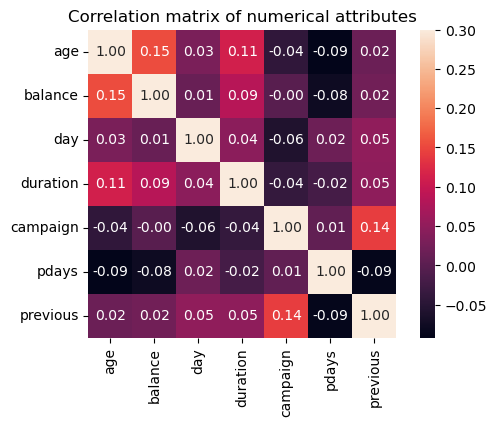

In [8]:
# Drop rows with missing values - we have not treated them yet
df_t1_wout_nan = df.dropna()

# Correlation matrix
corr_matrix = df_t1_wout_nan.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", vmax=.3, square=True)
plt.title('Correlation matrix of numerical attributes')
plt.show()



**df.corr()** calculates the correlation matrix for the dataframe, which shows how each numerical column in the dataframe correlates with every other numerical column. Correlation measures the strength and direction of the linear relationship between two variables. The result is a square matrix where the rows and columns represent the columns of the dataframe, and each cell contains the correlation coefficient between the corresponding pair of columns.
<br>
<br>
**sns.heatmap()** then **visualizes this correlation matrix as a heatmap**, where each cell's colour represents the value of the correlation coefficient. Typically, **warmer colors (e.g., red) indicate stronger positive correlations**, while **cooler colors (e.g., blue) indicate stronger negative correlations**.
<br>
<br>
The heat map suggests certain (albeit very small, note the vmax=0.3) positive correlation between the following attributes:
- **age and balance**: older clients tend to have more money in their accounts
- **campaign and previous**: the more number of calls for the previous campaigns, the more calls for the current one
- **age and duration**: older people tend to spend more time in the call (but "duration" should be treated carefully) 
<br>
<br>
And then a small negative correlation:
- **previous and pdays** - as expected, based on the previous numerical examination - I don't think this correlation is relevant to our exploration though
<br>
<br>

#### Pairwise plot

To reveal hidden patterns or trends that might not be apparent from analysing individual numerical variables alone we can use **pair plots**. They provide a quick and informative visual summary of the relationships between all pairs of numerical variables.
<br>
<br>
Please note: We are dropping all records with missing values for this plot.
<br>
<br>

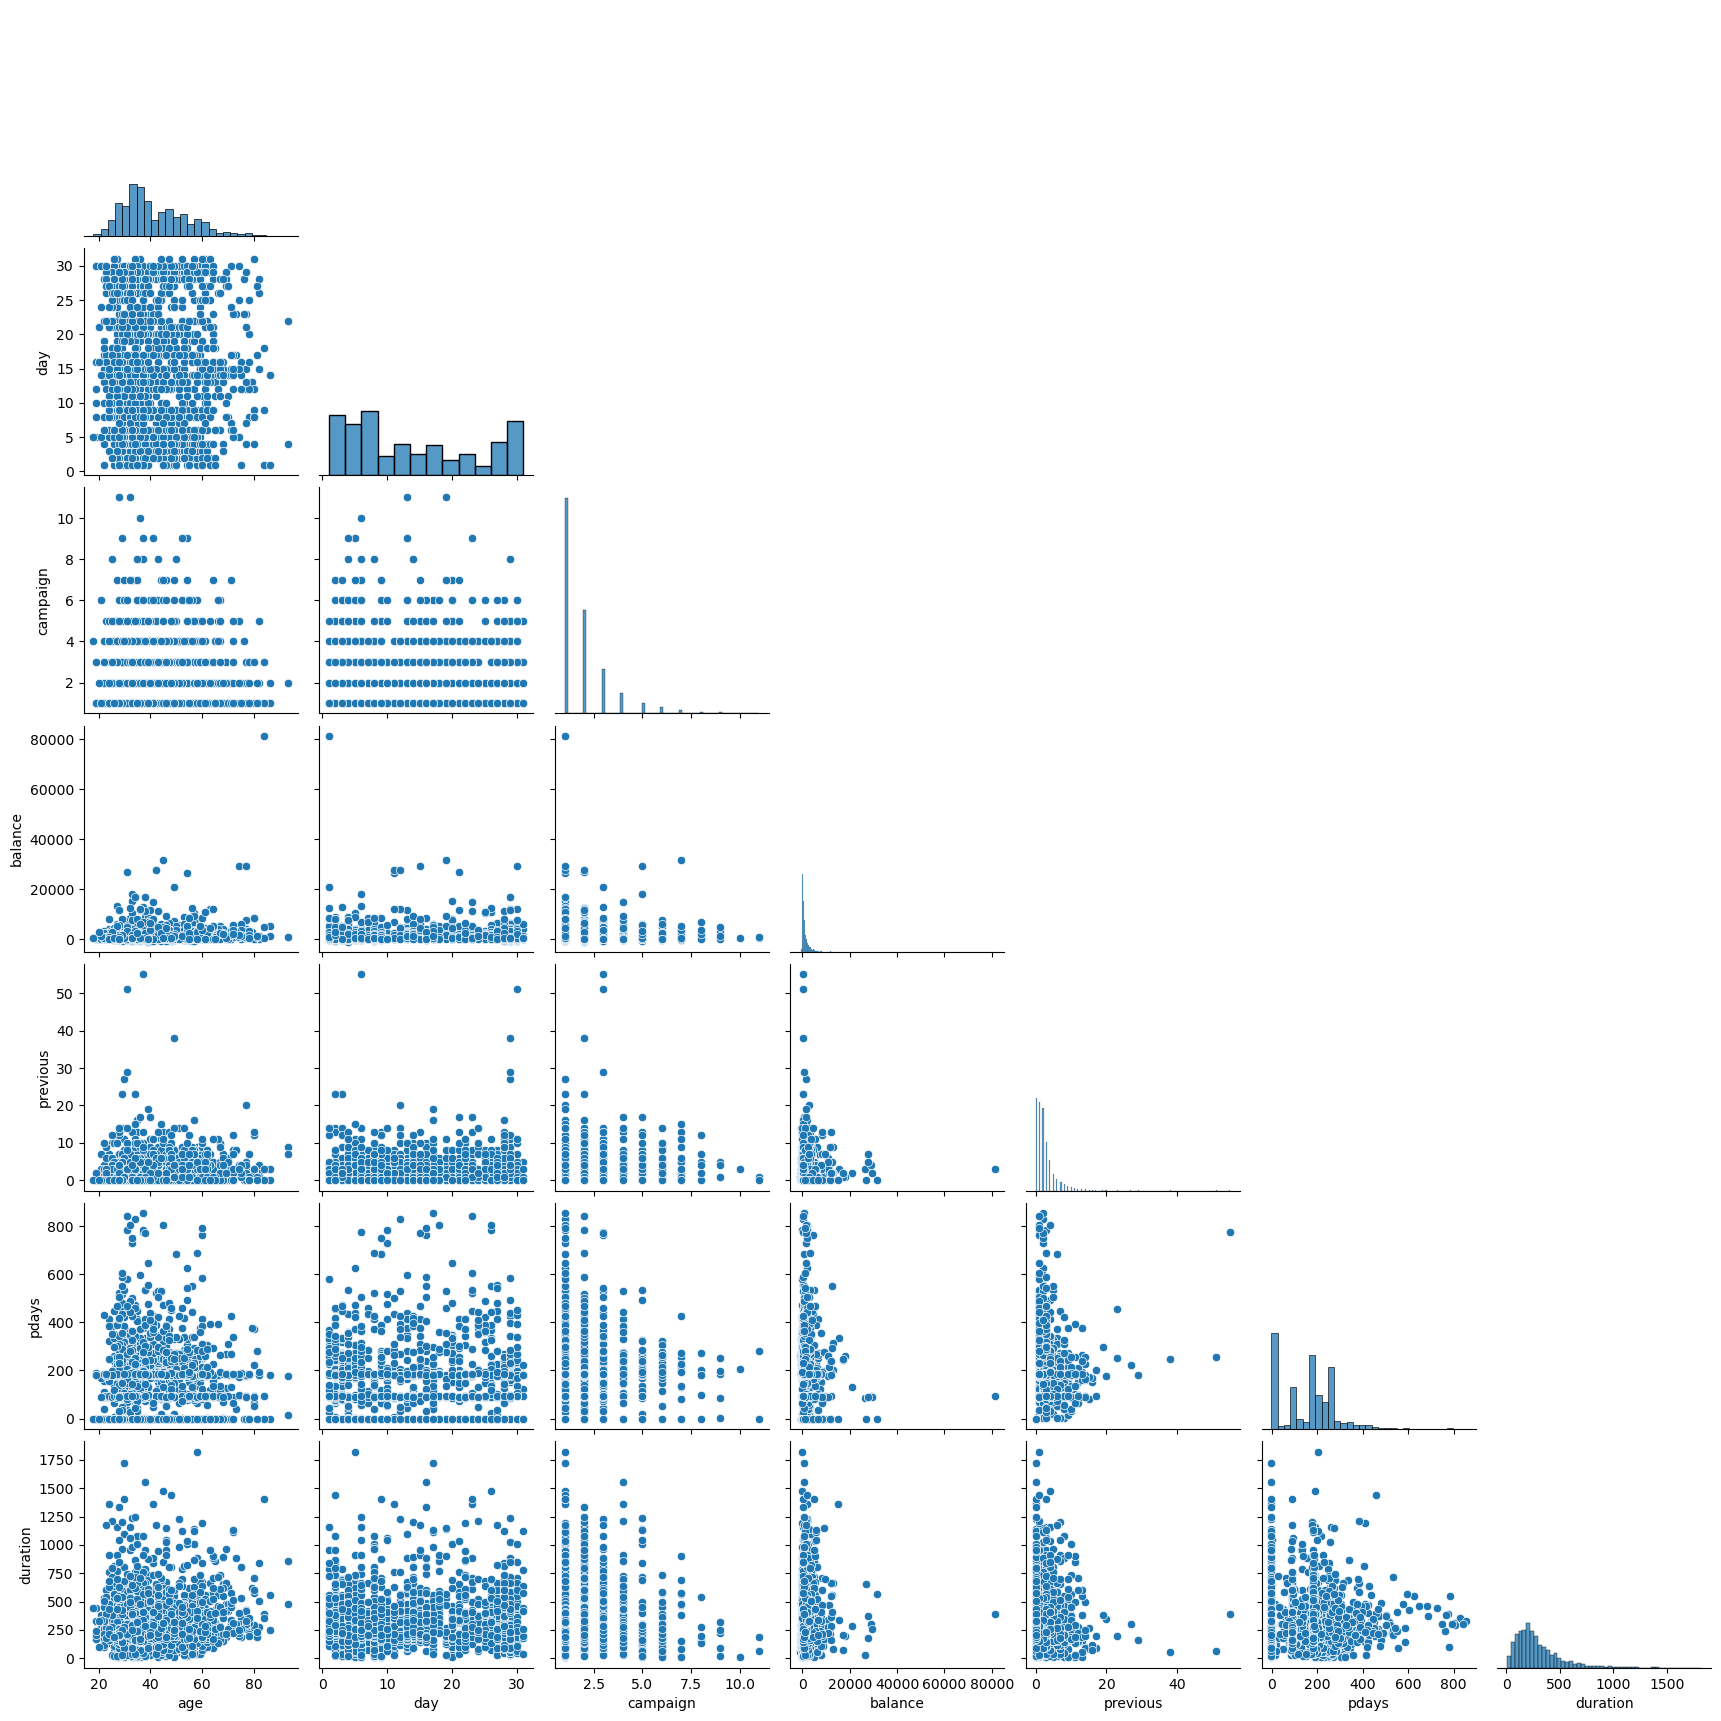

In [9]:
# We are dropping all records with missing values in the age attribute by applying the method dropna()
sns.pairplot(data=df[['age','day','campaign','balance','previous','pdays','duration']].dropna(), corner=True)
plt.show()



#### Observations

- The previously noted correlation age-balance is not really notable here, perhaps because of the presence of outliers.
<br>
- The histogram of age confirms skewness, more on that later.
<br>
- Contact days are unevenly spread, with the first and last days of the month being more commonly used for contacting clients.
<br>
- There might be a linear correlation between age and duration. Let's look at it closer:
<br>
<br>

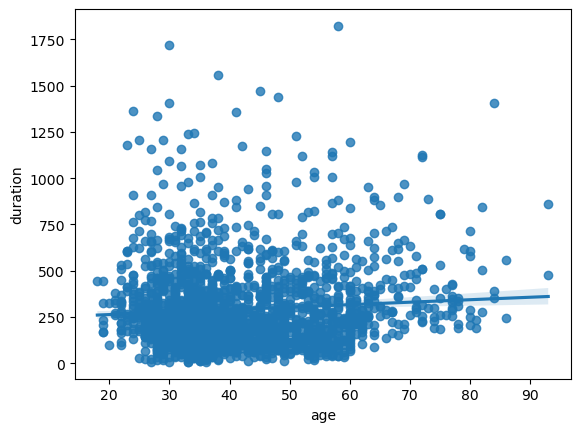

In [10]:
sns.regplot(data=df, x='age', y='duration')
plt.show()



No, this is inconclusive.

### Examination of categorical attributes

I will now look at the categorical (non-numerical) attributes to understand how well each category is represented in the dataset. Let's look at the dataset info again:
<br>
<br>

In [11]:
## Getting general information about the attributes
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1988 non-null   float64
 1   job         1990 non-null   object 
 2   marital     2000 non-null   object 
 3   education   1896 non-null   object 
 4   default     2000 non-null   object 
 5   balance     2000 non-null   int64  
 6   housing     2000 non-null   object 
 7   loan        2000 non-null   object 
 8   contact     1809 non-null   object 
 9   day         2000 non-null   int64  
 10  month       2000 non-null   object 
 11  duration    2000 non-null   int64  
 12  campaign    2000 non-null   int64  
 13  pdays       2000 non-null   int64  
 14  previous    2000 non-null   int64  
 15  poutcome    1546 non-null   object 
 16  subscribed  2000 non-null   object 
dtypes: float64(1), int64(6), object(10)
memory usage: 265.8+ KB


For a detailed breakdown of categorical attributes I am going to use Phil Miesles' solution because it is more concise and descriptive than my original solution, which was just a simple "print(df[attr].value_counts()" for each attribute, one by one.
<br>
<br>

In [12]:
print("| Attribute | Value Count | Unique Value Count | Total Count | Missing Count |")
print("|:---|:---|---|---|---|")

for column in df.columns:
    if df[column].dtype == 'object':
        value_counts = df[column].value_counts().to_dict()
        value_counts_str = "; ".join([f"{k}={v}" for k, v in value_counts.items()])

        totalCount = df[column].count()
        print(f"|{column}|{value_counts_str}|{df[column].nunique()}|{totalCount}|{2000-totalCount}|")


| Attribute | Value Count | Unique Value Count | Total Count | Missing Count |
|:---|:---|---|---|---|
|job|management=461; technician=348; blue-collar=298; admin.=247; services=165; retired=162; student=96; unemployed=69; self-employed=64; entrepreneur=45; housemaid=35|11|1990|10|
|marital|married=1111; single=674; divorced=215|3|2000|0|
|education|secondary=995; tertiary=684; primary=217|3|1896|104|
|default|no=1985; yes=15|2|2000|0|
|housing|no=1037; yes=963|2|2000|0|
|loan|no=1750; yes=250|2|2000|0|
|contact|cellular=1663; telephone=146|2|1809|191|
|month|feb=404; may=333; jan=245; apr=205; jul=167; aug=136; sep=134; jun=104; oct=93; mar=70; nov=68; dec=41|12|2000|0|
|poutcome|failure=955; success=444; other=147|3|1546|454|
|subscribed|no=1000; yes=1000|2|2000|0|


| Variable | Value Counts | Unique Value Count | Total Count | Missing Count |
|:---|:---|---|---|---|
|job|management=461; technician=348; blue-collar=298; admin.=247; services=165; retired=162; student=96; unemployed=69; self-employed=64; entrepreneur=45; housemaid=35|11|1990|10|
|marital|married=1111; single=674; divorced=215|3|2000|0|
|education|secondary=995; tertiary=684; primary=217|3|1896|104|
|default|no=1985; yes=15|2|2000|0|
|housing|no=1037; yes=963|2|2000|0|
|loan|no=1750; yes=250|2|2000|0|
|contact|cellular=1663; telephone=146|2|1809|191|
|month|feb=404; may=333; jan=245; apr=205; jul=167; aug=136; sep=134; jun=104; oct=93; mar=70; nov=68; dec=41|12|2000|0|
|poutcome|failure=955; success=444; other=147|3|1546|454|
|subscribed|no=1000; yes=1000|2|2000|0|

**Key data points and observations**:
<br>
- Almost 50% of clients have a housing loan - why would we want to tackle people with a housing loan to open a deposit?
- Subscribed ratio is exactly 50% (?)
- Very few clients in default
- Most clients were contacted on their cellphones
- Education values seem to copy the real spread in general population
- Many different jobs are covered, with management jobs making up the biggest part of samples
- The distribution of the "month of last contact" is uneven, but this might be misleading since we don't know the month the data was created. While the low number of calls in December is expected, the tenfold increase in February contacts is surprising. Therefore, we should interpret this attribute with caution.
- The "poutcome" attribute indicates the outcome of the previous marketing campaign for each client. Possible values include "failure," "success," and "other." However, the meaning of "other" is unclear as there's no definition provided in the data description. Additionally, there are 454 missing values for this attribute, which may further limit our ability to interpret the outcome of past campaigns.
- There are several binary attributes with yes/no, including our target "subscribed". There are no missing values in these binary variables.
- Some attributes have missing values which is something we will have to deal with in task 2
- As stated before, months are defined as text which is not ideal (again, task 2)



Let's also depict the numbers visually. A picture is worth a thousand words!

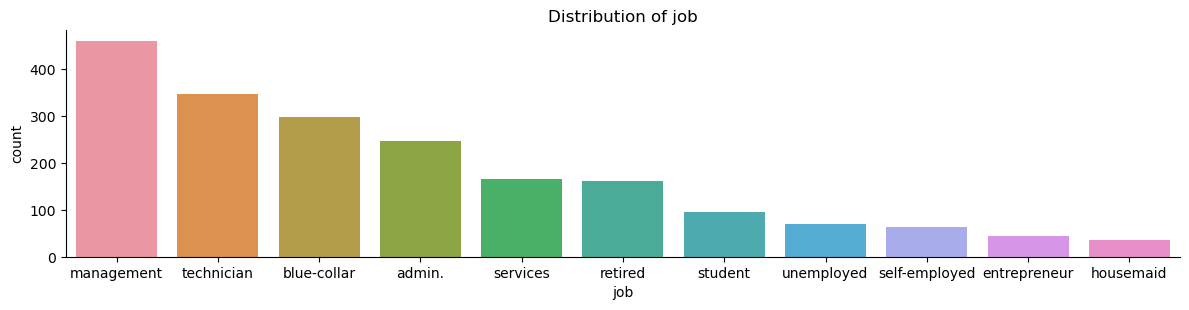

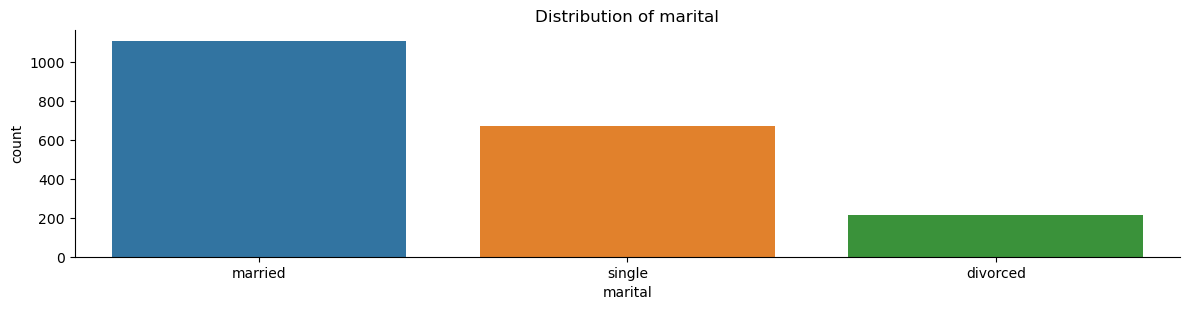

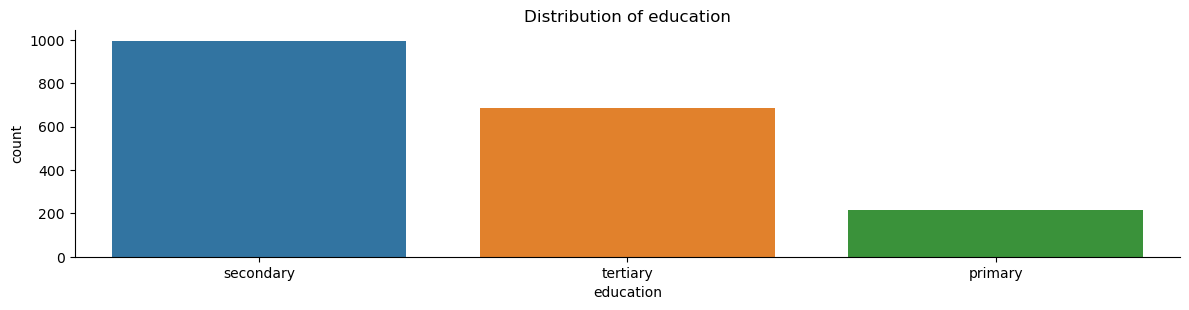

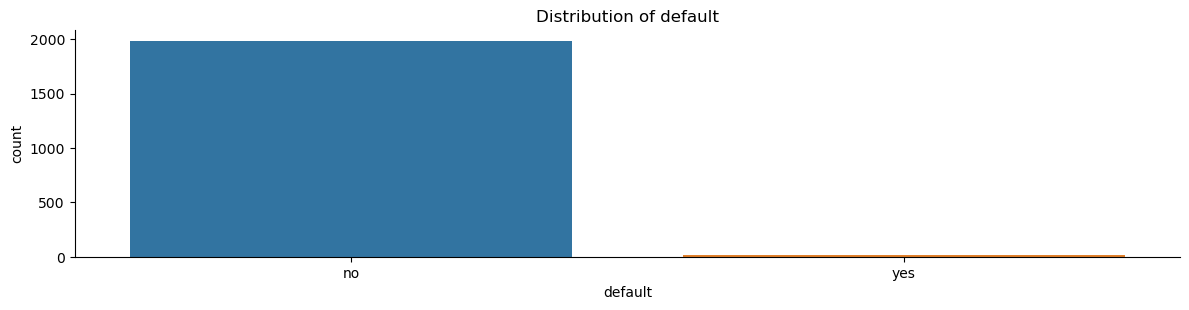

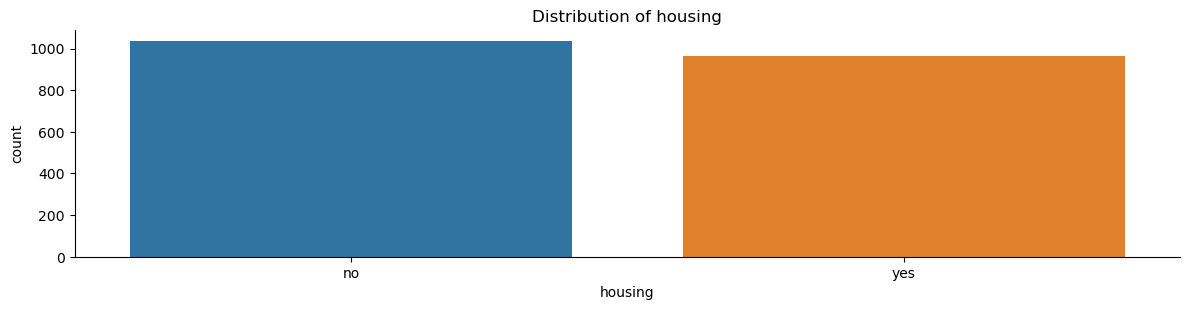

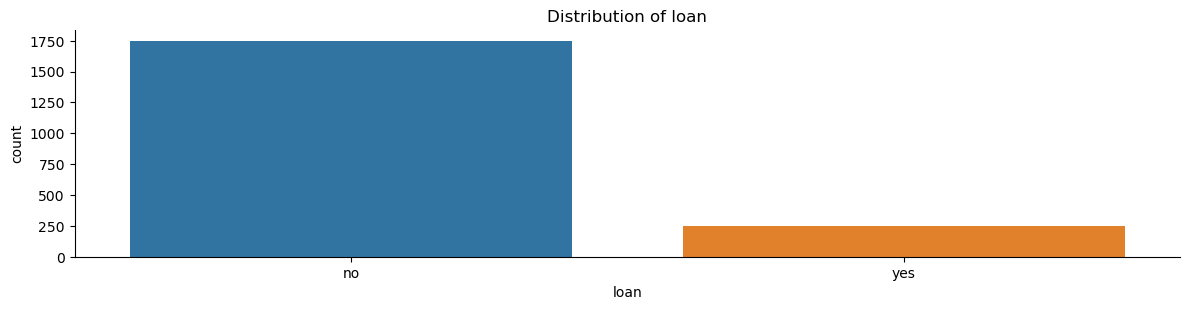

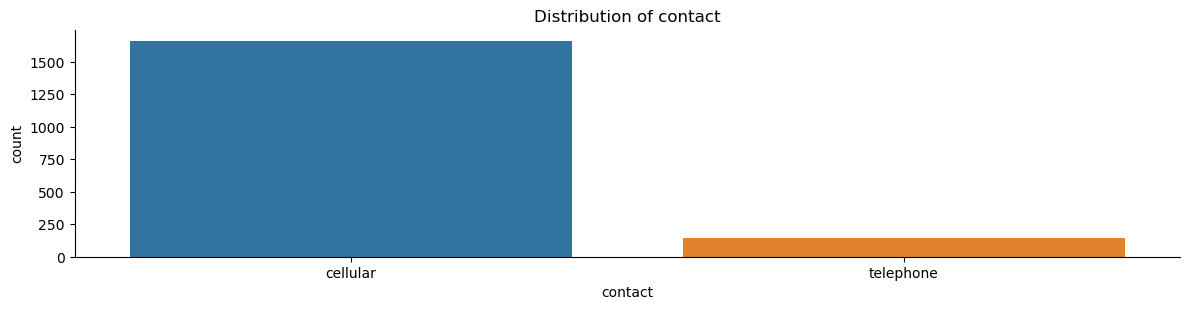

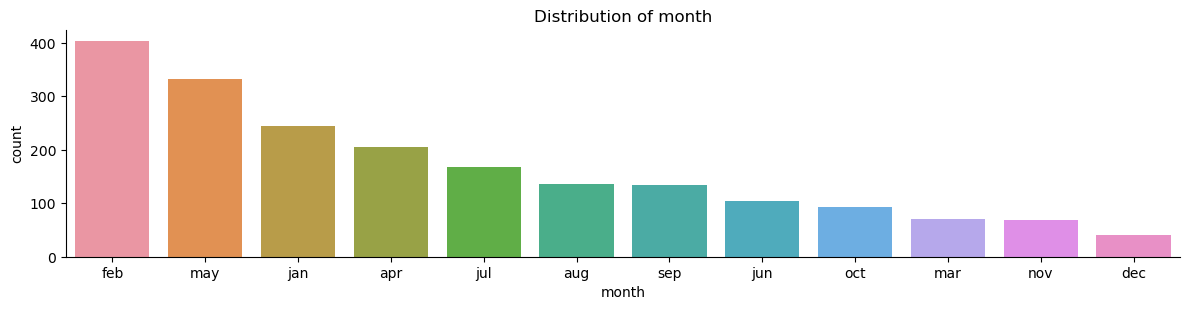

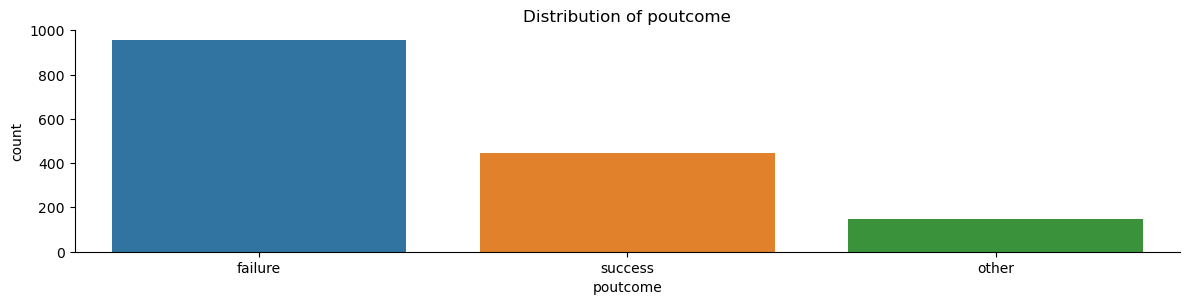

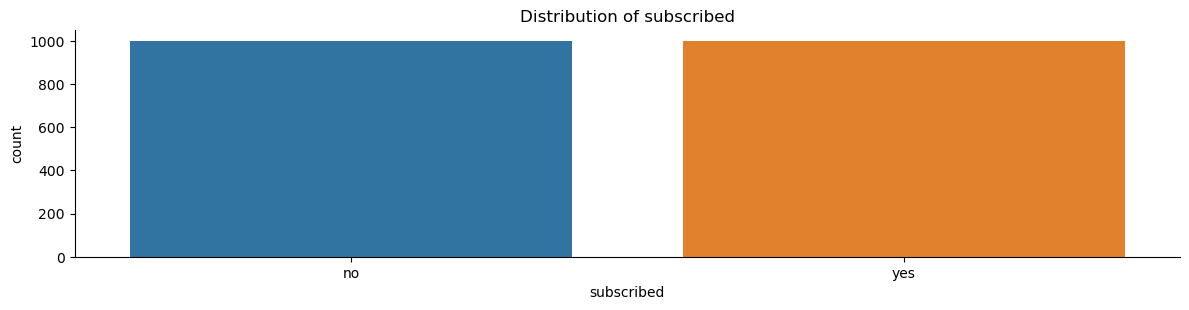

In [13]:
# Select categorical columns
categorical_columns = df.select_dtypes(include=['object'])

# Plot categorical attribute stats in descending order
for cat_column in categorical_columns:
    # Get the value counts of the column and sort them in descending order
    value_counts_desc = df[cat_column].value_counts().sort_values(ascending=False)
    
    # Plot the count plot with the sorted order
    sns.catplot(x=cat_column, kind='count', data=df, order=value_counts_desc.index, height=3, aspect=4)
    plt.title(f'Distribution of {cat_column}')
    plt.show()



<hr style="border:1px solid gray"> </hr>

## Task 1c: Use at least two different plotting techniques to plot the distribution of some numerical attributes. 


Let's look closer at the distribution of our numerical attributes to get more insight in our data.<br>
<br>
I am going to use two different techniques:
<br>
<br>
**Histogram**
<br>
This is a classic and widely used technique. A histogram divides the range of your data into bins (intervals) and counts the number of data points that fall within each bin. This is good for identifying the overall shape of the distribution (normal, skewed). As we saw in previous Etivities, our choice of bin size can affect the visualization.
<br>
<br>
**Box plot**
<br>
A box plot summarizes the distribution of your data using five key statistics: minimum, first quartile (Q1), median, third quartile (Q3), and maximum. The box represents the interquartile range (IQR) between Q1 and Q3. Whiskers extend from the box to the minimum and maximum values, with outliers plotted as individual points beyond the whiskers. Unlike histograms, box plots don't show the full shape of the distribution.
<br>
<br>

- **Age distribution**

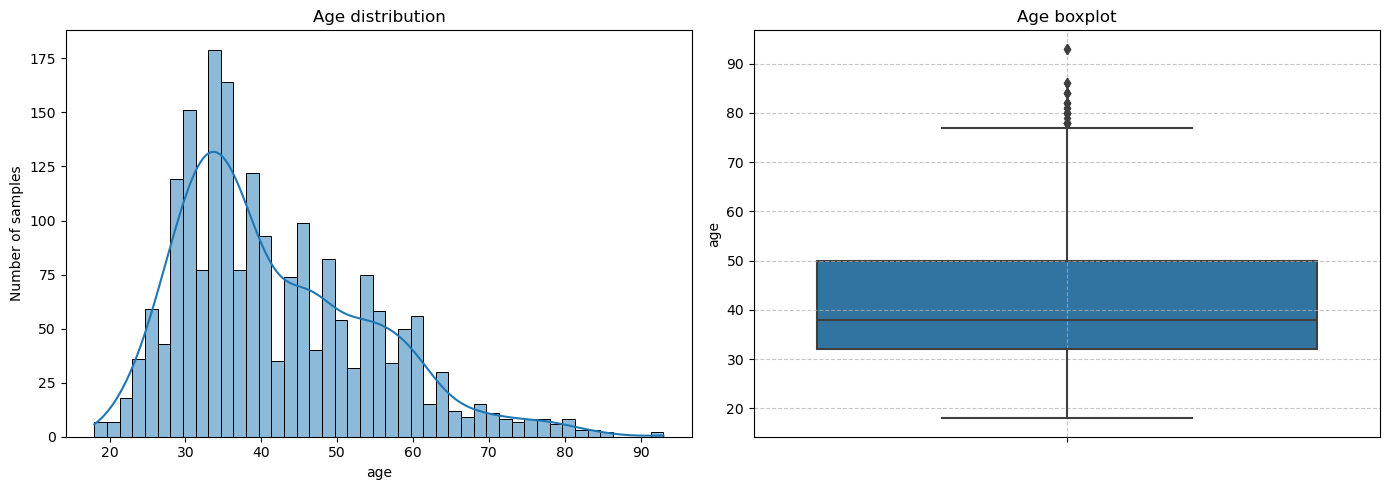

In [14]:
# Age distribution, let's plot the histogram and box plot side-by-side
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
# I am using the square root of the total number of data points to calculate the number of bins
# (square root of 2000 = 45)
sns.histplot(df['age'], bins=45, kde=True, ax=ax[0])
ax[0].set_title('Age distribution')
ax[0].set_ylabel('Number of samples')

sns.boxplot(y=df['age'], ax=ax[1])
ax[1].set_title('Age boxplot')
ax[1].grid(linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()



In the **histogram** we can see a positive skew with peakedness which was somehow expected: The right tail is longer and the mass of the distribution is concentrated on the left of the figure. I am expecting outliers on the right side of the spectrum. Also, there is a notable dip around the age of 40. 
<br>
<br>
The **box plot** helps us understand the distribution better. It confirms the presence of outliers at the higher spectrum of values. This was anticipated, based on our initial exploration and after looking at the histogram. This can be attributed to the smaller proportion of older adults in a population.
<br>
<br>
The skewness of the age histogram should also be visible in a violin plot:
<br>

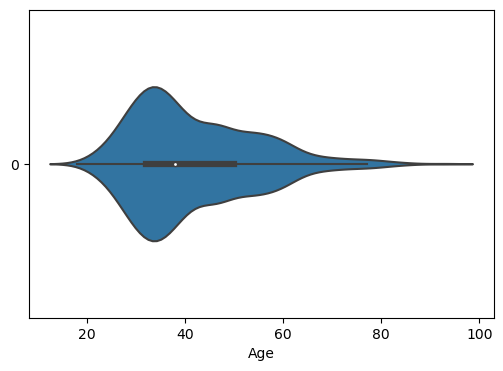

In [15]:
# Age violin plot
plt.figure(figsize=(6, 4))

sns.violinplot(data=df['age'], orient='h', width=0.5)
plt.xlabel("Age")
plt.show()


And we can also express the positive skew numerically: 

In [16]:
df_age=df['age']
print(f'Age skew: {df_age.skew():.6f}')


Age skew: 0.853921


- **Balance distribution**

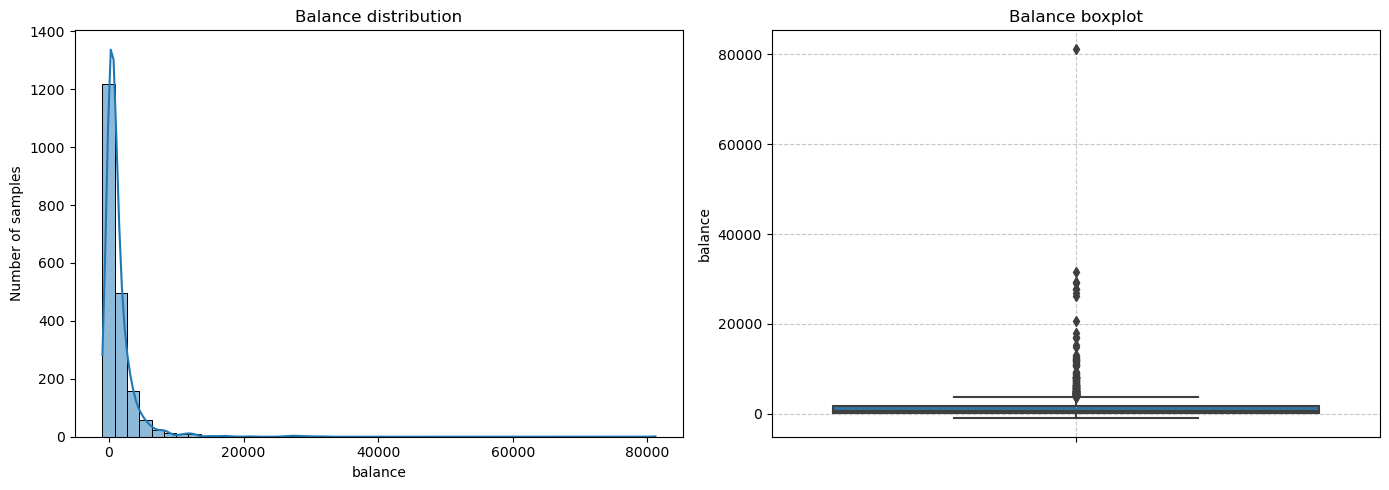

In [17]:
# Balance distribution, let's plot the histogram and box plot side-by-side
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
# I am using the square root of the total number of data points to calculate the number of bins
# (square root of 2000 = 45)
sns.histplot(df['balance'], bins=45, kde=True, ax=ax[0])
ax[0].set_title('Balance distribution')
ax[0].set_ylabel('Number of samples')

sns.boxplot(y=df['balance'], ax=ax[1])
ax[1].set_title('Balance boxplot')
ax[1].grid(linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()



The histogram clearly suggests that majority of clients have a balance in a small range between 0 and 8000-ish. Some clients are below zero. There are a lot of outliers above the maximum value and one extreme outlier (I wish it was me!) That annoying extreme is really skewing things up at this stage. This perhaps calls for a log transformation or a binary indicator later. Seems like this attribute is highly skewed:
<br>
<br>

In [18]:
df_balance=df['balance']
print(f'Balance skew: {df_balance.skew():.6f}')


Balance skew: 11.461564


This is a typical sign of a so-called **long tail distortion with an abundance of rare events in one direction**. We will deal with this in task 2.
<br>
<br>

Let's complement the histogram with a violin plot this time. It should confirm the distribution of clients' balance within a small range.

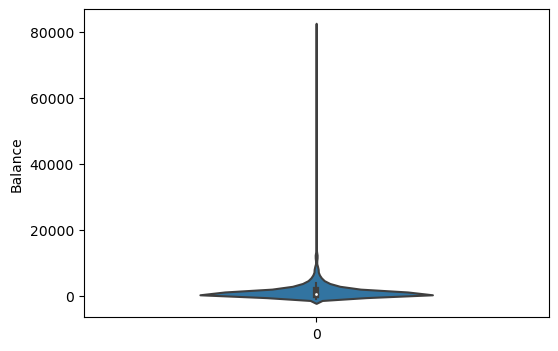

In [19]:
# Balance violin plot
plt.figure(figsize=(6, 4))

sns.violinplot(data=df['balance'], orient='v', width=0.5)
plt.ylabel("Balance")
plt.show()



The plot is pretty clear in describing the distribution of balance within a small range of values.
<br>
<br>
As we can see, there is one extreme outlier in the "balance" attribute. It might be better for us to plot the distribution without that one sample. Let's do this and cap the values of balance to 10000:

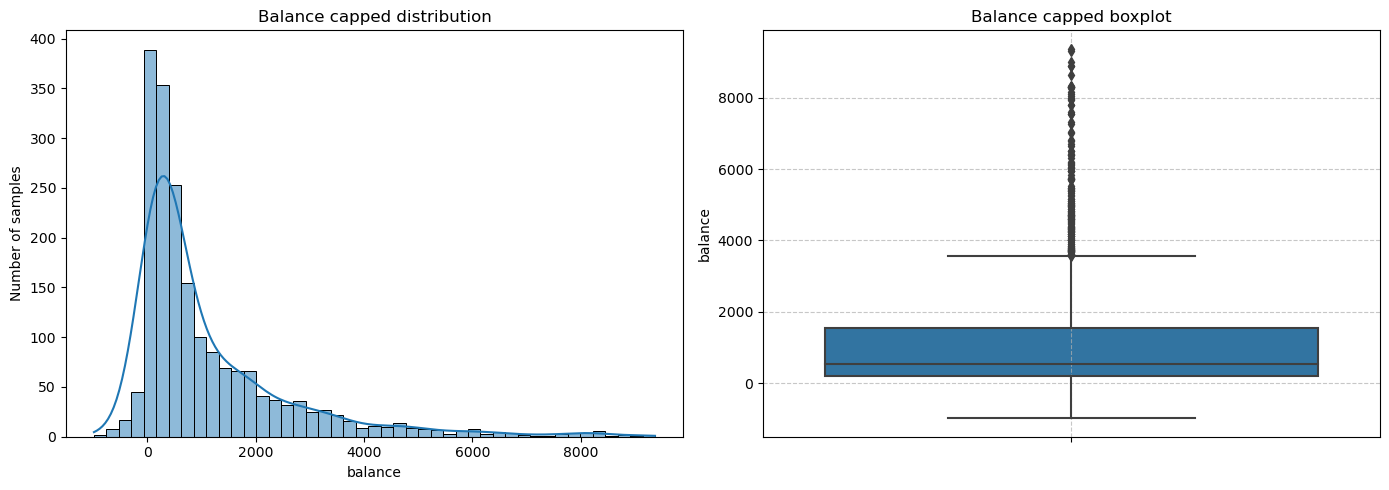

In [20]:
# Setting the limit
balance_limit = 10000
df_balance_cap = df[df['balance'] < balance_limit]['balance']

# Balance distribution capped, let's plot the histogram and box plot side-by-side
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
# I am using the square root of the total number of data points to calculate the number of bins
# (square root of 2000 = 45)
sns.histplot(df_balance_cap, bins=45, kde=True, ax=ax[0])
ax[0].set_title('Balance capped distribution')
ax[0].set_ylabel('Number of samples')

sns.boxplot(y=df_balance_cap, ax=ax[1])
ax[1].set_title('Balance capped boxplot')
ax[1].grid(linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()



The plots are more descriptive this time. We can even see thgat there are negative values which was not clear when the plots were skewed by that extreme outlier.  
<br>
<br>

- **pdays distribution**

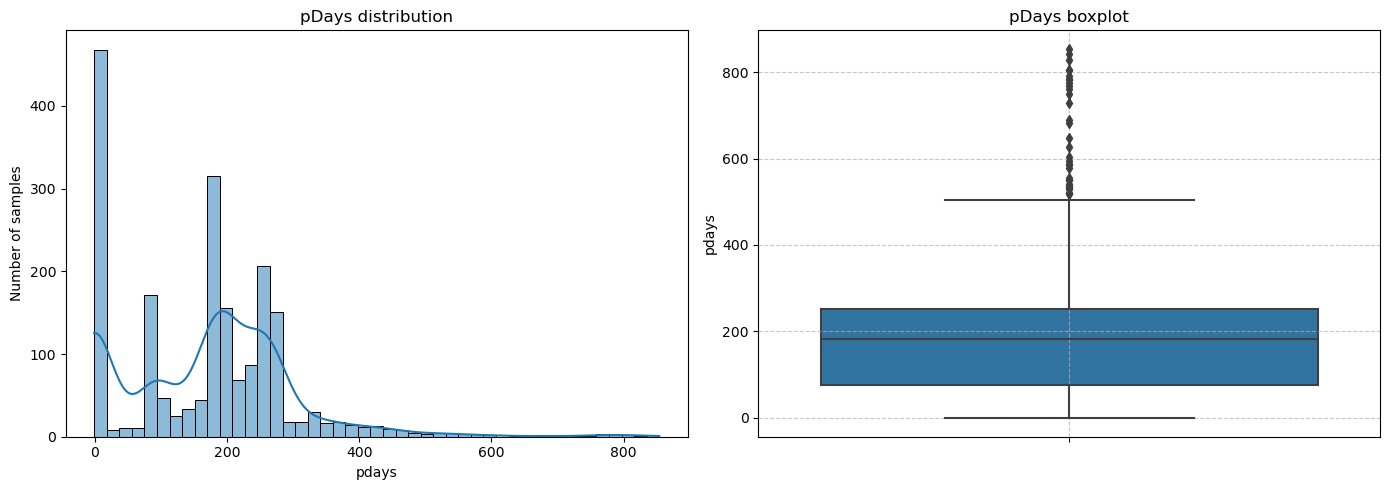

In [21]:
# pDays distribution, let's plot the histogram and box plot side-by-side
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
# I am using the square root of the total number of data points to calculate the number of bins
# (square root of 2000 = 45)
sns.histplot(df['pdays'], bins=45, kde=True, ax=ax[0])
ax[0].set_title('pDays distribution')
ax[0].set_ylabel('Number of samples')

sns.boxplot(y=df['pdays'], ax=ax[1])
ax[1].set_title('pDays boxplot')
ax[1].grid(linestyle='--', alpha=0.7)
# ax[1].set_ylim(-2,50)

plt.tight_layout()
plt.show()



We know from the previous stats that there are samples with the value of -1 in pdays attribute. This value really disrupts the distribution of data which otherwise seem to be Gaussian-like. We can also see the presence of outliers again.
<br>
<br>
I am going to finish this section with same plots for all remaining attributes.
<br>
<br>

- **campaign distribution**

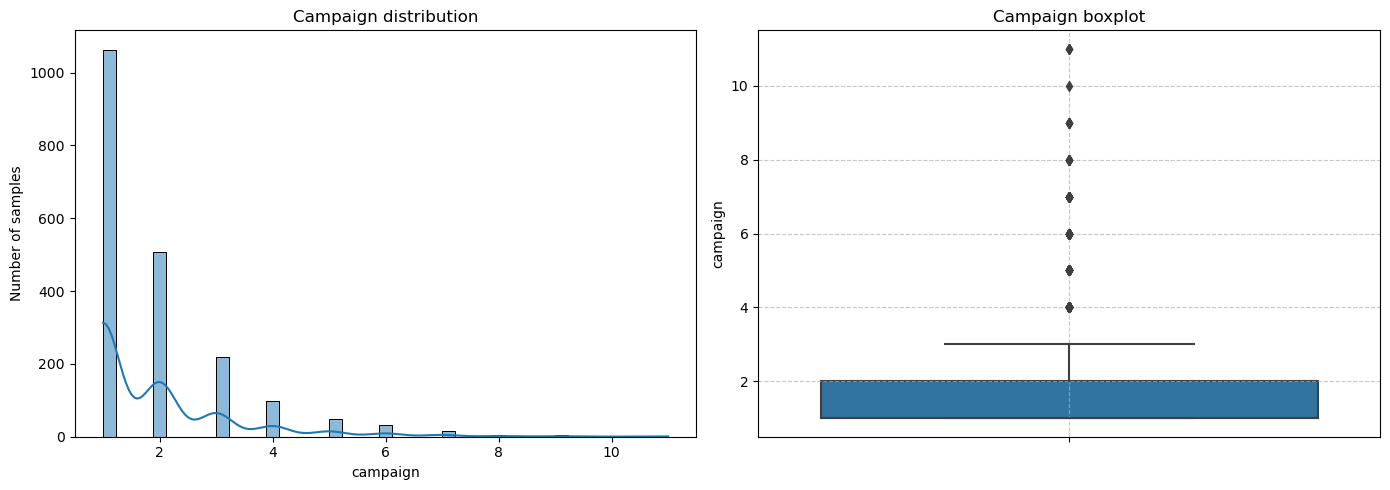

In [22]:
# Campaign distribution, let's plot the histogram and box plot side-by-side
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
# I am using the square root of the total number of data points to calculate the number of bins
# (square root of 2000 = 45)
sns.histplot(df['campaign'], bins=45, kde=True, ax=ax[0])
ax[0].set_title('Campaign distribution')
ax[0].set_ylabel('Number of samples')

sns.boxplot(y=df['campaign'], ax=ax[1])
ax[1].set_title('Campaign boxplot')
ax[1].grid(linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()



- **previous distribution**

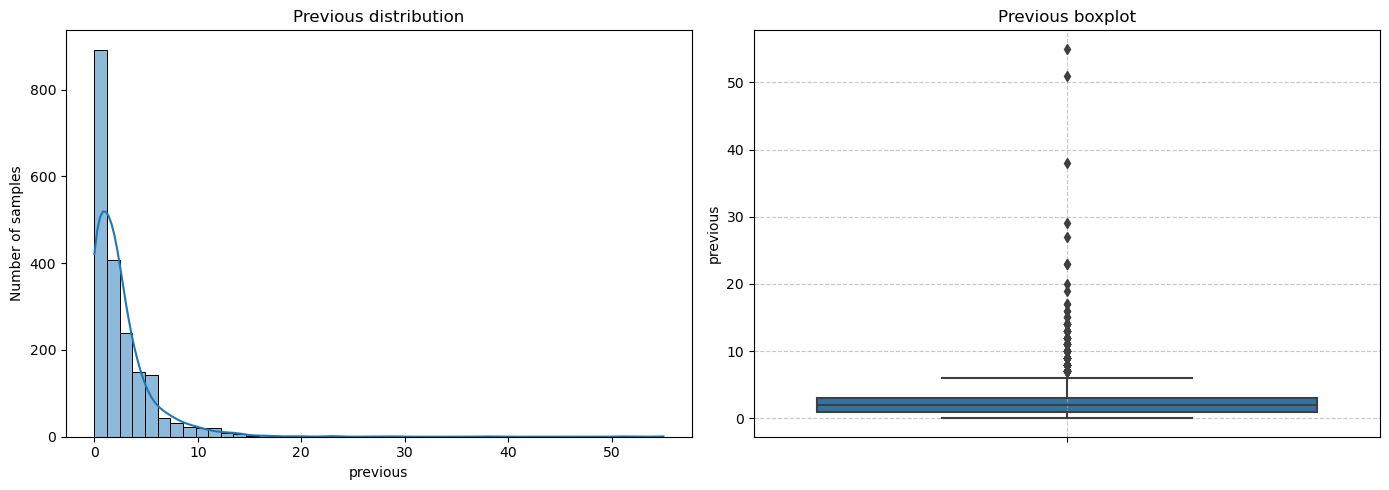

In [23]:
# Previous distribution, let's plot the histogram and box plot side-by-side
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
# I am using the square root of the total number of data points to calculate the number of bins
# (square root of 2000 = 45)
sns.histplot(df['previous'], bins=45, kde=True, ax=ax[0])
ax[0].set_title('Previous distribution')
ax[0].set_ylabel('Number of samples')

sns.boxplot(y=df['previous'], ax=ax[1])
ax[1].set_title('Previous boxplot')
ax[1].grid(linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()



This is again a right skewed positive distribution with a long tail, many rare values.
<br>

- **Duration distribution**

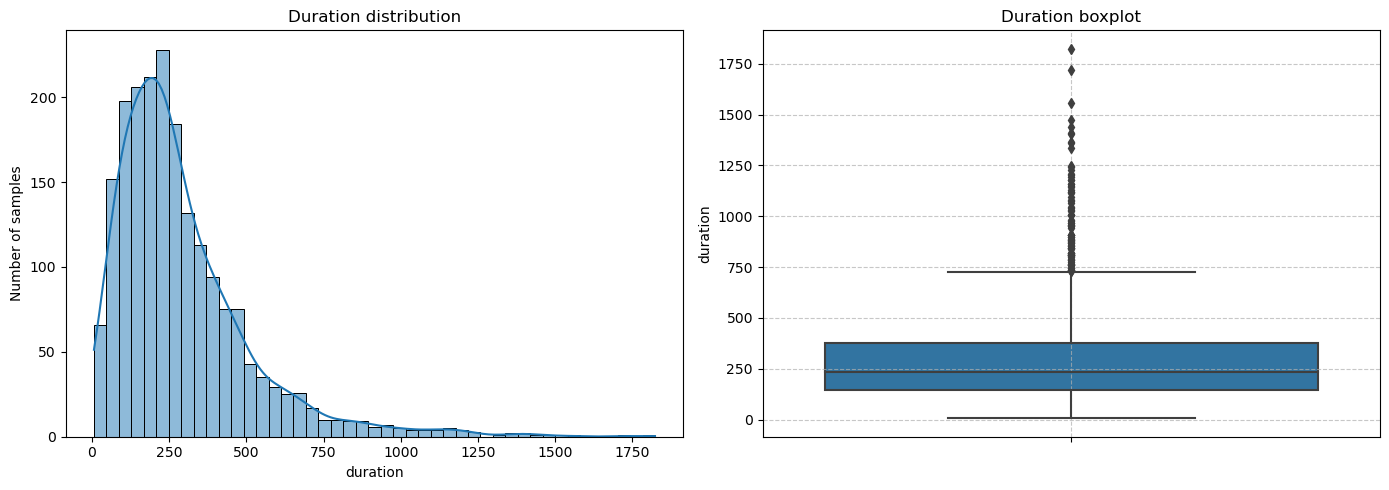

In [24]:
# Duration distribution, let's plot the histogram and box plot side-by-side
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
# I am using the square root of the total number of data points to calculate the number of bins
# (square root of 2000 = 45)
sns.histplot(df['duration'], bins=45, kde=True, ax=ax[0])
ax[0].set_title('Duration distribution')
ax[0].set_ylabel('Number of samples')

sns.boxplot(y=df['duration'], ax=ax[1])
ax[1].set_title('Duration boxplot')
ax[1].grid(linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()



Except for "campaign" all numerical attributes above show a right-skewed distribution, presence of outliers, and signs of a long tail distortion.
<br>
<br>
Let's finish this off with a summary of skewness of our numerical attributes:
<br>

In [25]:
df_num=df[['age','day','campaign','balance','previous','pdays','duration']]
df_num.skew()

age          0.853921
day          0.403661
campaign     2.320856
balance     11.461564
previous     5.461168
pdays        0.920006
duration     2.045787
dtype: float64

As we have seen before, all numerical attributes are positively skewed, of which balance is extreme.
<br>

### Task 1d: Generate at least two plots with the combined distribution of attributes.


There are a few ways to interpret "combined distribution of attributes":

**Side-by-side box plots**
<br>
These are separate box plots for each group, positioned side-by-side on the same plot. This allows us to visually compare the central tendency (median), spread (IQR), and potential outliers for each group.
<br>

**Violin Plot**
<br>
A violin plot combines the elements of a box plot and a "kernel density plot". It shows the distribution of the data for each group with a boxplot in the center and a density curve on either side. This allows us to see both the central tendency and spread alongside the overall shape of the distribution for each group.

**Scatter Plot**
<br>
This is the most common way to visualize the relationship between two numerical attributes. Each data point represents an observation, and its position on the x and y axes reflects the values of the two attributes. Patterns in the scatter plot, like clusters, linear trends, or non-linear relationships, reveal potential connections between the variables.

**Heatmap**
<br>
A heatmap can be used to visualize the correlation matrix for all pairs of numerical attributes in your data. Each cell in the heatmap represents the correlation coefficient between two variables, typically colored according to the strength and direction of the correlation (positive or negative). We have already seen this further up this Etivity.



Let's start with a side-by-side box plot to see age distribution by job:

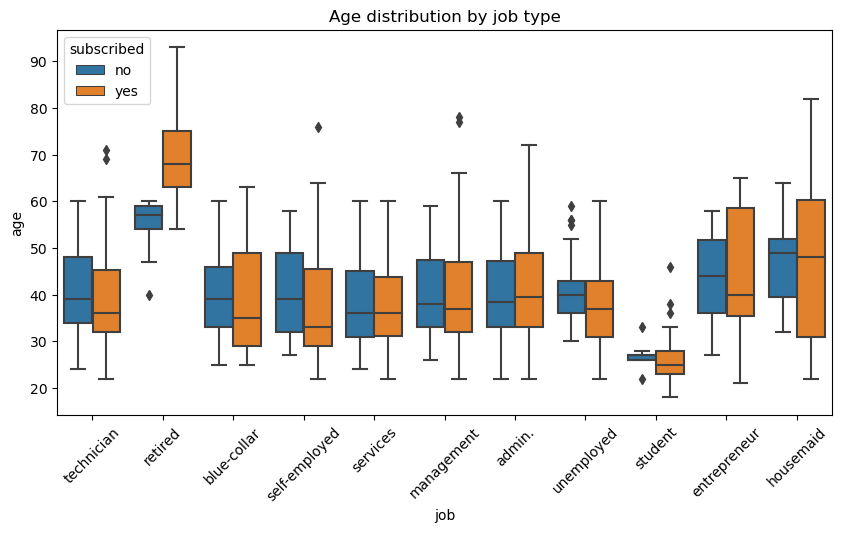

In [26]:
# Age distribution by job
plt.figure(figsize=(10, 5))
sns.boxplot(x="job", y="age", hue="subscribed", data=df)
plt.xticks(rotation=45)
plt.title("Age distribution by job type")
plt.show()



We clearly see some patterns here. The "retired" job (is that a job?) is interesting because it is the only job type that has outliers on both sides (40 vs. 93). Also, retired people tend to subscribe at a later age. This pattern is not visible for any other type of job. Students are obviously younger but there are some "old" outliers (is that me?). Another interesting observation is the age distribution of housemaids. No outliers and a very wide range of age.
<br>
<br>
Let's try age vs. education now:
<br>

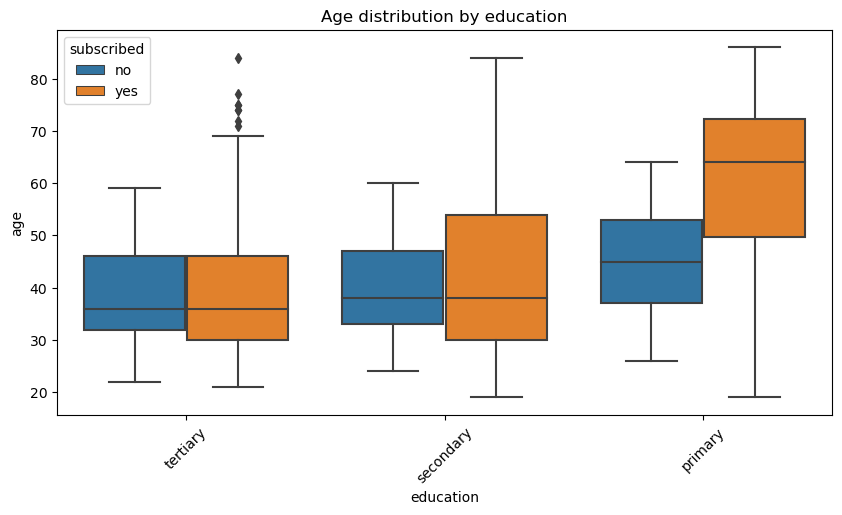

In [27]:
# Age distribution by education
plt.figure(figsize=(10, 5))
sns.boxplot(x="education", y="age", hue="subscribed", data=df)
plt.xticks(rotation=45)
plt.title("Age distribution by education")
plt.show()


This is really interesting. Those with primary education tend to subscribe at a much older age than secondary and tertiary educated clients. Let's confirm this by a violin plot:
<br> 

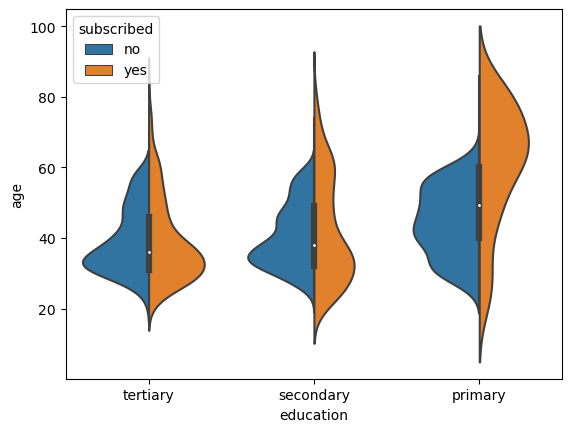

In [28]:
sns.violinplot(data=df, x='education', y='age', hue='subscribed', split=True)
plt.show()


Based on the previous plot I am curious: are most of the retired clients primary-educated?
<br>

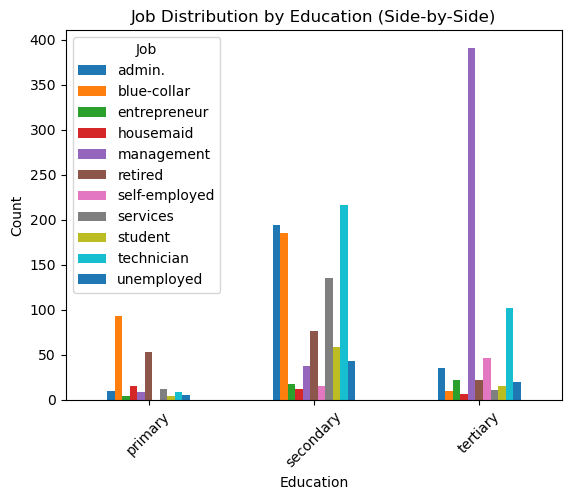

In [29]:
# Create the contingency table education-job
contingency_table = pd.crosstab(df['education'], df['job'])

# Visualize the table (optional)
contingency_table.plot(kind='bar')
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Job Distribution by Education (Side-by-Side)')
plt.legend(title='Job')
plt.xticks(rotation=45)
plt.show()


No, there is more secondary-educated retired clients than primary-educated ones.
<br>
<br>
Let's try balance vs education now. But to make the plot more readable, I am going to limit the balance to 10000 again. Remember that client with a 80000 balance?
<br>

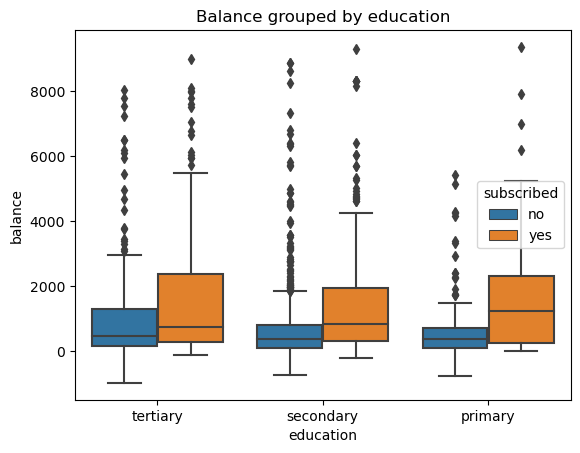

In [30]:
# Box plot of Balance, grouped by the categorical attribute education
balance_limit = 10000
sns.boxplot(x="education", y="balance", hue="subscribed", data=df[df['balance'] < balance_limit])
plt.title('Balance grouped by education')
plt.show()



It is perhaps not surprising that those with a higher account balance subscribe more to a term deposit. And this is valid across all education types.
<br>
<br>
Now let's see the relationship balance-age-subscription. But this time I am using a scatter plot which might be better to use in this case. Again, I am excluding the extreme balance outlier:
<br>

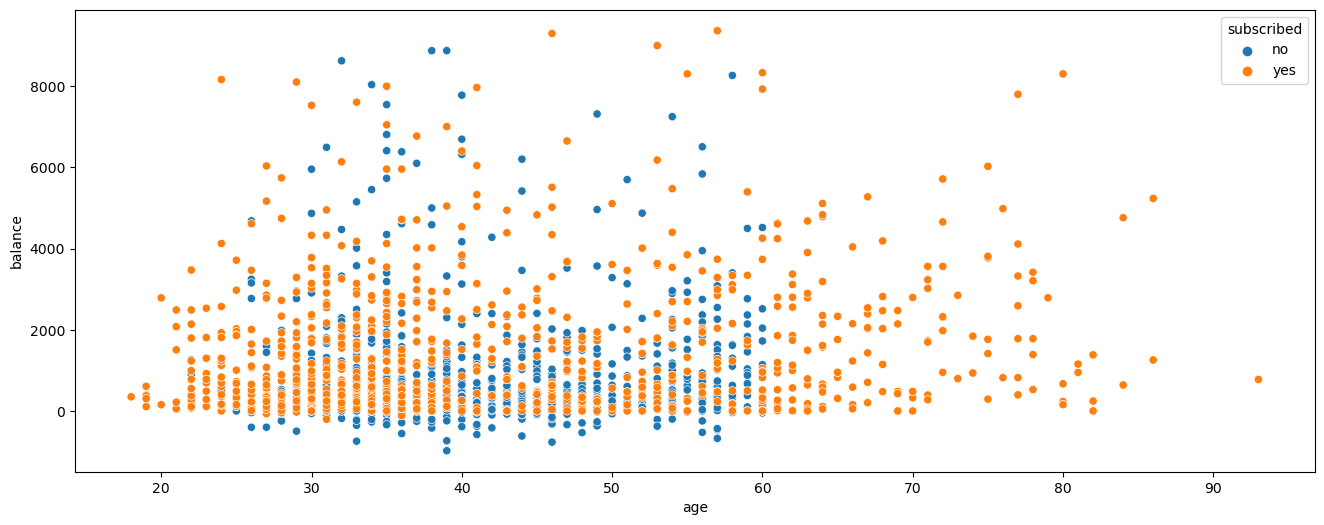

In [31]:
plt.figure(figsize=(16, 6))
sns.scatterplot(x="age", y="balance", hue="subscribed",data=df[df['balance'] < balance_limit])
plt.show()


Although this plot seems to be messy a bit, it reveals one interesting point: all clients above 60 years of age subscribed to the deposit, regardless their account balance! Same for young people below 25, perhaps students? A violin plot could tell us which job types above 60 it is related to:
<br>
<br>

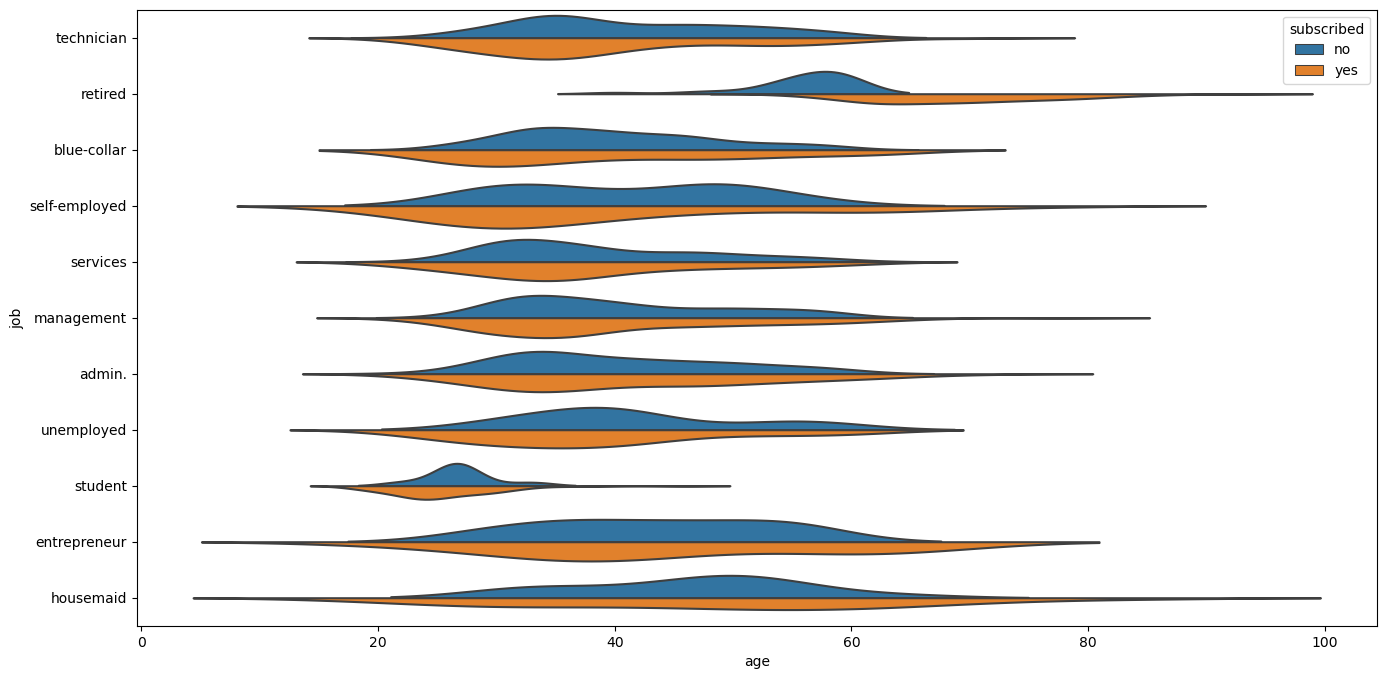

In [32]:
plt.figure(figsize=(16, 8))
sns.violinplot(data=df, x='age', y='job', hue='subscribed', inner=None, split=True)
plt.show()


Yes, it is the retired people above 60 and students below 25 who tend to subscribe the most.
<br>
<br>

Now let's try to find if there is any correlation between month, day of month and subscription ratio:
<br>

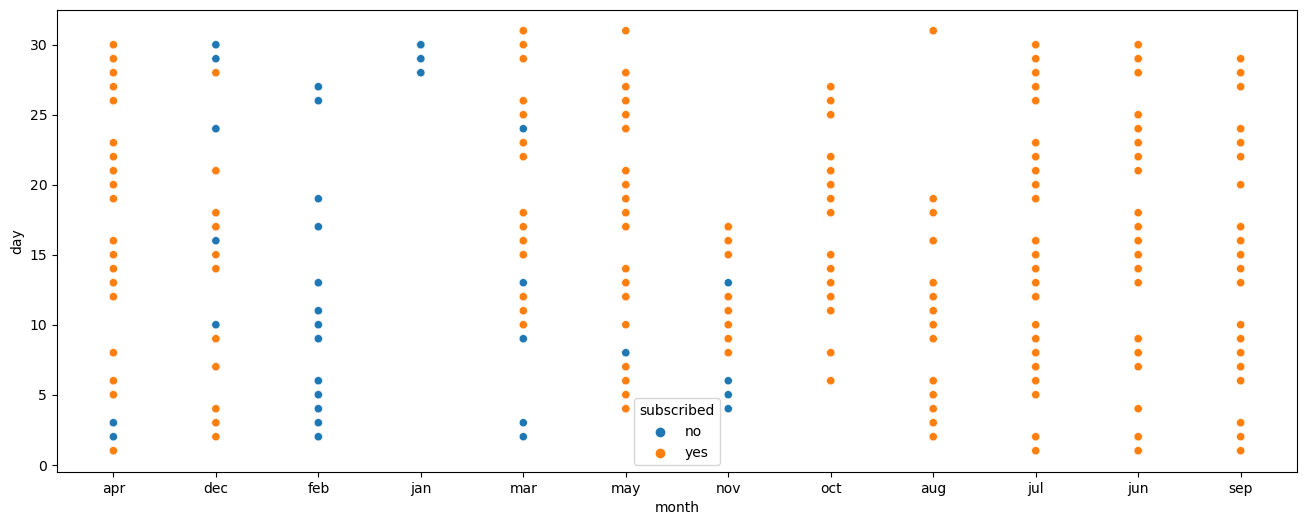

In [33]:
plt.figure(figsize=(16, 6))
sns.scatterplot(x="month", y="day", hue="subscribed",data=df)
plt.show()


Wow. It seems that there is nothing else to explore. All what's needed to get a client to subscribe is to call them between June and October!
<br>
<br>
Let's show the same in a different form:
<br>

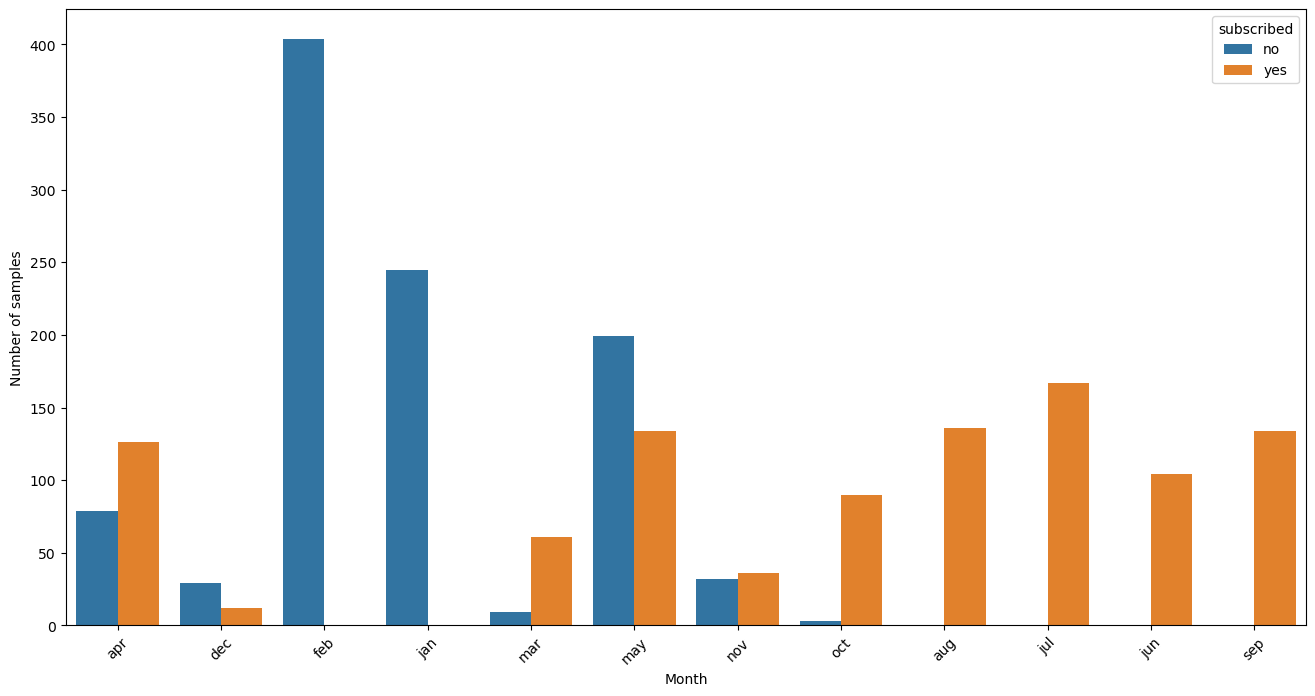

In [34]:
plt.figure(figsize=(16, 8))
plot = sns.countplot(data = df, x = 'month', hue="subscribed")
plt.setp(plot.get_xticklabels(), rotation=45)
plt.xlabel("Month")
plt.ylabel("Number of samples")
plt.show()


<br>
<br>
We could continue with many more plots but let's focus now on our question. I am going to answer this by using a crosstab.
<br>
<br>

<hr style="border:1px solid gray"> </hr>

**Is there a correlation between the number of calls required to secure client approval for a term deposit and the education level of clients who subscribe to the deposit?**
<br>
<br>

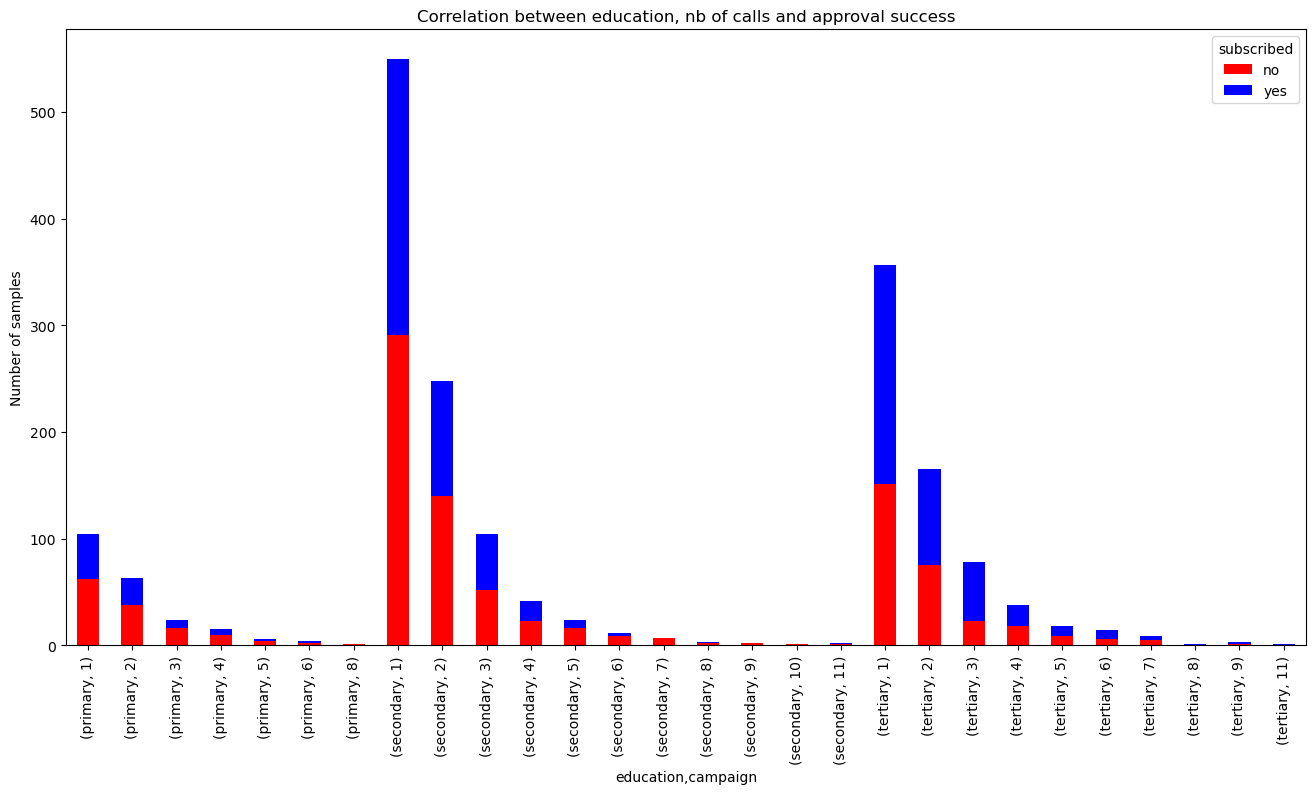

In [35]:
# A correlation between the number of calls needed to secure the approval and education level?
crosstab_1c = pd.crosstab([ df['education'], df['campaign']], df['subscribed'])

crosstab_1c.plot(kind='bar', stacked=True, color=['red', 'blue'], grid=False, figsize=(16, 8))
plt.title('Correlation between education, nb of calls and approval success')
plt.ylabel('Number of samples')
plt.show()



And the answer is: **NO, there does not seem to be any significant(!) correlation between the education and the number of calls needed to secure the approval.** There seems to be a higher ratio of subscriptions for 3rd and 4th call for tertiary educated clients but the difference is not significant.
<br>
<br>
Let's confirm that using a violin plot again:
<br>

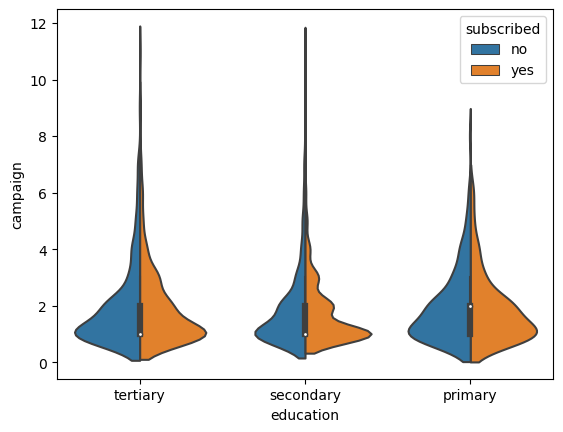

In [36]:
sns.violinplot(data=df, x='education', y='campaign', hue='subscribed', split=True, figsize=(16, 8))
plt.show()


Let's try a few more plots to finish this section.
<br>
<br>
Subscription ratio vs jobs:
<br>

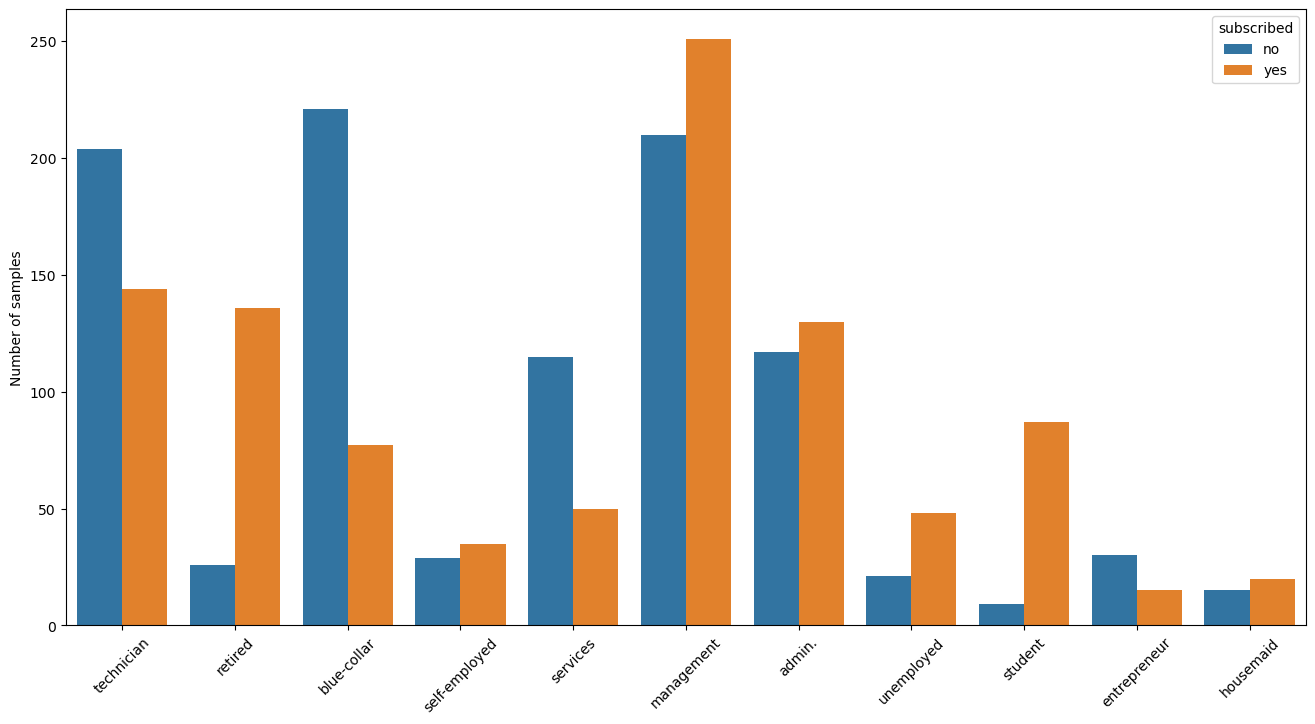

In [37]:
plt.figure(figsize=(16, 8))
plot = sns.countplot(data = df, x = 'job', hue="subscribed")
plt.setp(plot.get_xticklabels(), rotation=45)
plt.xlabel("")
plt.ylabel("Number of samples")
plt.show()


Marital vs subscribed:
<br>

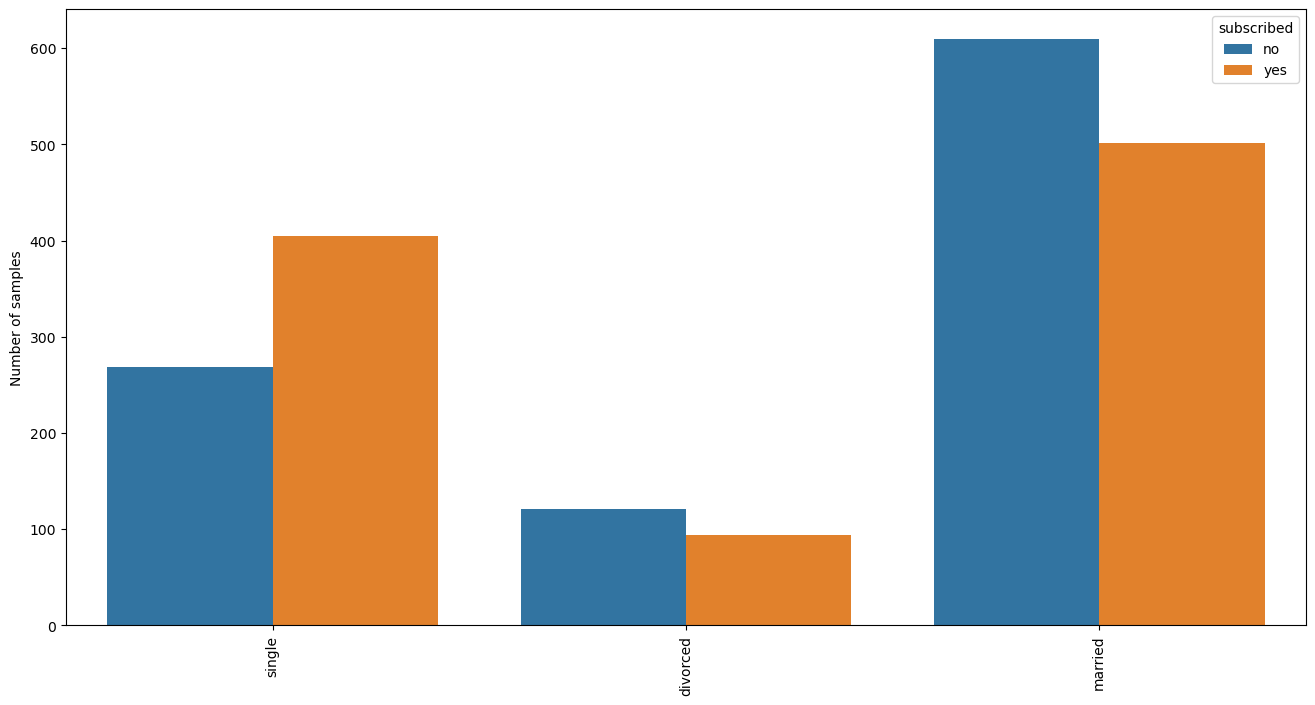

In [38]:
plt.figure(figsize=(16, 8))
plot = sns.countplot(data = df, x = 'marital', hue="subscribed")
plt.setp(plot.get_xticklabels(), rotation=90)
plt.xlabel("")
plt.ylabel("Number of samples")
plt.show()


And now a simple box plot that will give us an insight into relationship between age and marital/education:
<br>

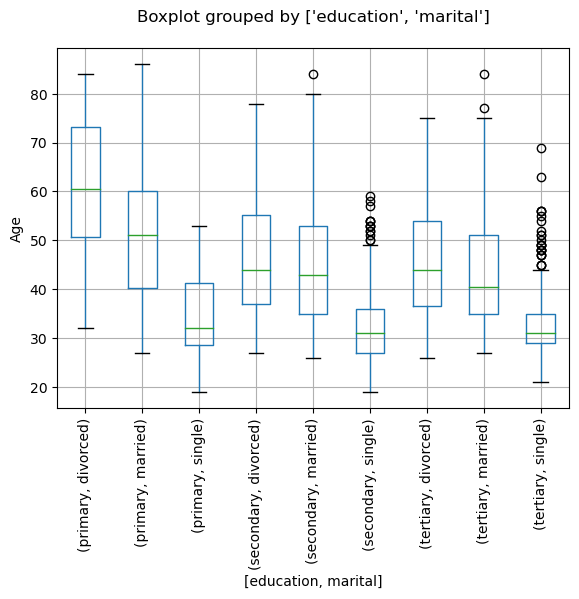

In [39]:
df.boxplot(column='age', by=['education','marital'], rot=90)
plt.title("")
plt.ylabel("Age")
plt.show()

Again, those primary educated clients strike me - primary clients get divorced later than secondary or tertiary educated?
<br>
<br>
Let's try education vs subscription:
<br>

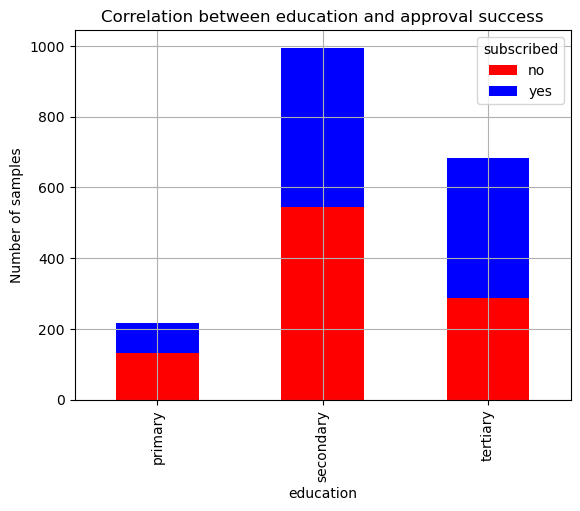

In [40]:
# Education vs subscription
crosstab_1a = pd.crosstab([ df['education']], df['subscribed'])
crosstab_1a.plot(kind='bar', stacked=True, color=['red', 'blue'], grid=True)
plt.title('Correlation between education and approval success')
plt.ylabel('Number of samples')
plt.show()



There is a difference in the ratio of subscribed clients based on their education: clients with a higher education tend to subscribe more. Not surprising.
<br>
<br>

What about those who already have a housing loan?

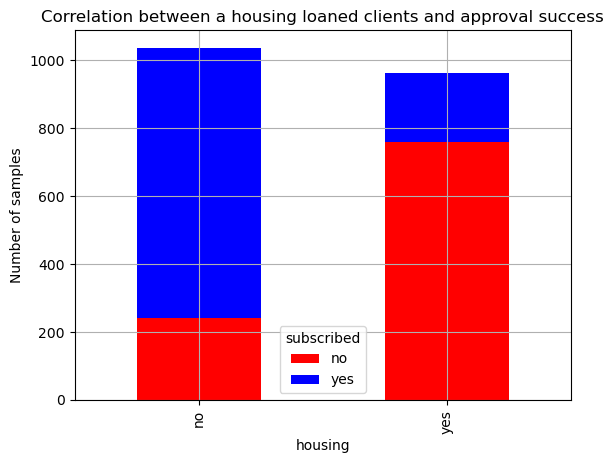

In [41]:
# Crosstab for housing loan and subscribed
crosstab_1b = pd.crosstab([ df['housing']], df['subscribed'])
crosstab_1b.plot(kind='bar', stacked=True, color=['red', 'blue'], grid=True)
plt.title('Correlation between a housing loaned clients and approval success')
plt.ylabel('Number of samples')
plt.show()



Well, once you are squeezed with your monthly payments for your house, there's probably nothing left for a term deposit...

And lastly, let's look at age vs subscription. We have already seen a plot for age grouped by education above. This is a general overview:
<br>

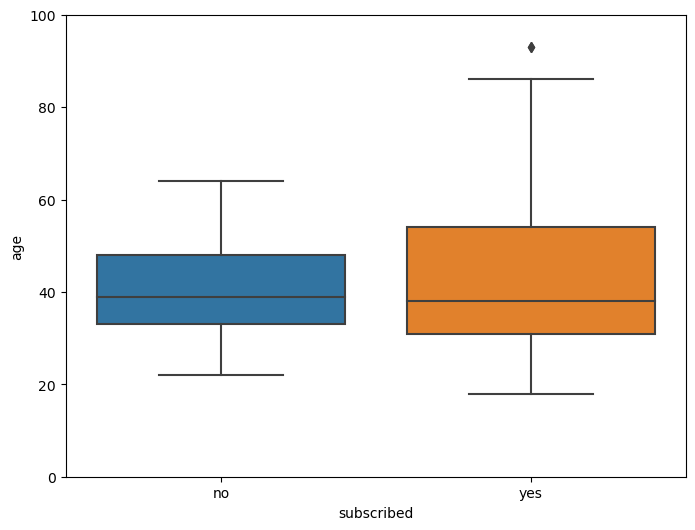

In [42]:
#box plot age/subscribed
var = 'subscribed'
data = pd.concat([df['age'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="age", data=data)
fig.axis(ymin=0, ymax=100);



The age median of those who subscribe and not subscribe is almost same. But the range of age of those who subscribe is larger.

<hr style="border:2px solid gray"> </hr>

# Task 2

- fill in all missing values
- encode all categorical attributes as numerical
- apply a scaler to rescale features
- treat outliers and skewed attribute distribution appropriately
- create at least one new feature from the existing ones
<br>
<br>
Let's make a copy of the original dataframe for this task and let's look at the categorical data again:

In [43]:
# Create a copy of the original DataFrame
df_t2 = df.copy()



<hr style="border:1px solid gray"> </hr>

### Missing data

Important questions to ask when handling missing data:
<br>
- Do we have missing values?
- How are they expressed in the data? Should I withhold samples with missing values or should I replace them?
- Which values should they be replaced with?
- How prevalent is the missing data?
- Is missing data random or does it have a pattern?
- Missing values may not always be NaNs. We need to understand the dataset well in order to identify which values are "missing".
<br>
<br>
The answer to these questions is important for practical reasons because missing data can imply a reduction of the sample size. In our case, we have only 1000 samples. Removing data with outliers could even prevent us from proceeding with the analysis. We also need to ensure that the missing data process is not biased.
<br>
<br>
At first I am going to check if there are any records with all missing values:

In [44]:
# Checking if there are records with all features missing (except for the target "subscribed" value)

# Drop the target field from the DataFrame
df_t2_wout_target = df_t2.drop(columns=['subscribed'])

# Check if all features (excluding the target field) in each row are NaN
rows_with_all_nan = df_t2_wout_target.isnull().all(axis=1)

# Filter the DataFrame to get rows with all NaN values
rows_with_all_nan_df = df_t2_wout_target[rows_with_all_nan]

# Display rows with all NaN values
print(rows_with_all_nan_df)



Empty DataFrame
Columns: [age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome]
Index: []


There are **no records with null values for all features**. Good.
<br>
<br>
Now I am going to check how many missing values each attribute has:

In [45]:
# Missing data
df_total = df_t2.isnull().sum().sort_values(ascending=False)
df_percent = 100.0*(df_t2.isnull().sum()/df_t2.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([df_total, df_percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(30)



,Total,Percent
poutcome,454,22.70
contact,191,9.55
education,104,5.20
age,12,0.60
job,10,0.50
default,0,0.00
balance,0,0.00
housing,0,0.00
loan,0,0.00
day,0,0.00


We can see that no column has more than 25% missing values. We perhaps do not need to consider dropping whole columns because of missing data.
<br>
<br>
My first draft excluded the "contact" attribute because there are only two distinct values (cellular, telephone) and about 10% of values are missing. However, following Josh's advice, I'm keeping it included because there could be a significant relationship between the way clients are contacted and the outcome of the campaign.
<br>
<br>

But now we have to decide how we are going to update the missing values.

#### Attribute "age" - missing values
The choice is quite clear, let's use the mean value. We do not want to lose data from this feature and there is only about 0.6% missing values.
<br>
<br>

In [46]:
# Filling the age with a mean value in-place
df_t2['age'].fillna(df_t2['age'].mean(), inplace=True)



#### Attribute "job" - missing values

There are two viable options here:
- either use the **most frequent value**
- or use a new value "unknown"
<br>
<br>
There are only 0.5% of values missing so I am going to use the most frequent value. What's the distribution of values?
<br>
<br>

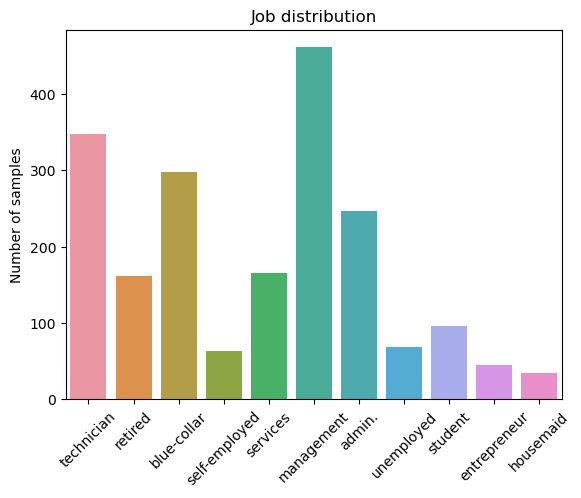

In [47]:
# Distribution of jobs
plot = sns.countplot(data=df_t2, x='job')
plt.xticks(rotation=45)
plt.title("Job distribution")
plt.ylabel("Number of samples")
plt.xlabel("")
plt.show()


In [48]:
# Find the mode (most frequent value) of the "job" attribute
mode_job = df_t2['job'].mode()[0]
print(f'The most frequent job is: {mode_job}')

# Fill missing values with the mode
df_t2['job'] = df_t2['job'].fillna(mode_job)
print(f'Missing values filled in with "{mode_job}"')



The most frequent job is: management
Missing values filled in with "management"


#### Attribute "education" - missing values
This one is intriguing. We definitely do not want to lose this attribute but the number of missing values is quite high, about 5%. There are several possible strategies:
<br>
- Mode imputation <br>
  If the number of missing values is relatively small and the distribution of existing values is skewed towards certain categories, we can impute the missing values with the mode (most frequent value) of the "education" attribute.
<br>
- Create a new category <br>
  We can create a new category, such as "unknown" to explicitly mark missing values.
<br>
- Impute based on other features <br>
  If we have other features in our dataset that are correlated with education (e.g., job title, income level), we can use these features to impute missing values in the "education" attribute.
<br>
<br>
Let's look at the distribution of values first:


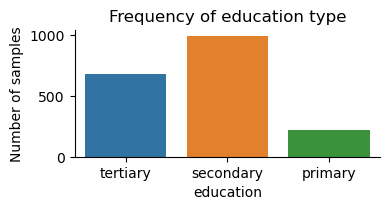

In [49]:
# Checking distribution of values in the "education" attribute
sns.catplot(x='education', kind='count', data=df_t2, height=2, aspect=2)
plt.title(f'Frequency of education type')
plt.ylabel("Number of samples")
plt.show()



No, we do not want to use the most frequent value because none of the values are totally prevalent.
<br>
<br>
Instead, let's examine the relationship between job and education because I have a feeling that these two attributes could be correlated. We will do so by creating a so-called **contingency table**. A contingency table, also known as a cross-tabulation table, is a statistical table that displays the frequency distribution of two or more categorical variables. Contingency tables are especially useful for our purpose: for examining the relationship between two categorical variables. They allow for easy comparison of the distribution of one variable across different categories of another variable, helping to identify patterns, associations, or dependencies between the variables.
<br>
<br>

In [50]:
# Create a contingency table (cross-tabulation) between job and education
contingency_table = pd.crosstab(df_t2['job'], df_t2['education'])

# Display the contingency table
print(contingency_table)



education      primary  secondary  tertiary
job                                        
admin.              10        194        35
blue-collar         93        185        10
entrepreneur         4         18        22
housemaid           16         12         7
management          11         40       392
retired             53         77        22
self-employed        0         15        47
services            12        135        11
student              4         59        16
technician           9        217       102
unemployed           5         43        20


It is quite clear that some jobs are linked to a certain degree of education: admin/secondary, management/tertiary, etc. Based on this observation, I am going to impute the missing "education" values with values inferred from the "job" attribute values:
<br>
<br>

In [51]:
print(40*'-')
print(f'Attribute stats before imputation: \033[1meducation\033[0m')
print()
print(df_t2['education'].value_counts(dropna=False))
print()


----------------------------------------
Attribute stats before imputation: education

secondary    995
tertiary     684
primary      217
NaN          104
Name: education, dtype: int64



In [52]:
# Find the mode value for each "job"
mode_values = {}
for job in contingency_table.index:
    mode_values[job] = contingency_table.loc[job].idxmax()

# Impute missing values in "education" attribute
for index, row in df_t2.iterrows():
    if pd.isnull(row['education']):
        job = row['job']
        mode_education = mode_values[job]
        df_t2.at[index, 'education'] = mode_education



And let's check the attribute "education" again:

In [53]:
print(40*'-')
print(f'Attribute stats after imputation: \033[1meducation\033[0m')
print()
print(df_t2['education'].value_counts(dropna=False))
print()



----------------------------------------
Attribute stats after imputation: education

secondary    1068
tertiary      715
primary       217
Name: education, dtype: int64



#### Attribute "contact" - missing values
This attribute might be important. It represents the way clients are contacted. Almost 10% of values are missing which seems like a problem on the data entry side because every single client must have been contacted somehow. Let's look at the distribution for this attribute:
<br>
<br>

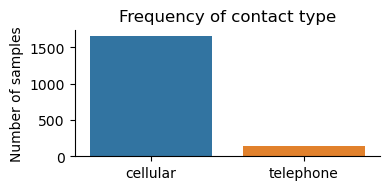

In [54]:
# Checking distribution of values in the "education" attribute
sns.catplot(x='contact', kind='count', data=df_t2, height=2, aspect=2)
plt.title(f'Frequency of contact type')
plt.ylabel("Number of samples")
plt.xlabel("")
plt.show()



There are very few clients contacted by telephone. We perhaps could fill the missing data with "cellular" but I am deciding to use a new "unknown" value.

In [55]:
# Fill missing values with "unknown"
df_t2['contact'] = df_t2['contact'].fillna('unknown')



#### Attribute "poutcome" - missing values
This attribute is important. It represents the "outcome of the previous marketing campaign". Almost 25% of values are missing which is understandable and the value NaN basically means that there was no outcome. Let's look at the distribution for this attribute:
<br>
<br>

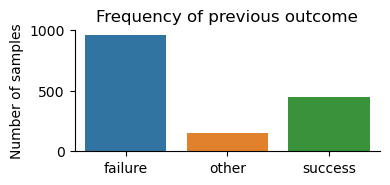

In [56]:
# Checking distribution of values in the "education" attribute
sns.catplot(x='poutcome', kind='count', data=df_t2, height=2, aspect=2)
plt.title(f'Frequency of previous outcome')
plt.ylabel("Number of samples")
plt.xlabel("")
plt.show()



Hmm, what does the "other" outcome mean? I guess it means the same as the missing value - and can really be considered as a "missing value" although it is not a "NaN". I could eventually fill the missing data with an "unknown" value (as other students did) but I feel that it would create more unnecessary noise.
<br>
Let's update the missing data with the "other" value and we are done.
<br>
<br>

In [57]:
# Fill missing values with "unknown"
df_t2['poutcome'] = df_t2['poutcome'].fillna('other')



Let's confirm we have no missing data in our dataset amymore:
<br>

In [58]:
# Missing data
df_total = df_t2.isnull().sum().sort_values(ascending=False)
df_percent = 100.0*(df_t2.isnull().sum()/df_t2.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([df_total, df_percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(30)


,Total,Percent
age,0,0.0
day,0,0.0
poutcome,0,0.0
previous,0,0.0
pdays,0,0.0
campaign,0,0.0
duration,0,0.0
month,0,0.0
contact,0,0.0
job,0,0.0


<hr style="border:1px solid gray"> </hr>

### Creating new features

- **age bins** <br>
I am going to create a new feature inferred from the attribute age: instead of a continuous value I am going to use bins representing ranges. I believe this is more appropriate for making decisions related to age. This is also called discretization.
<br>
<br>

In [59]:
# Define bin edges for age
age_bins = [0, 25, 35, 45, 55, 65, 75, 100]

# Define labels for the bins
age_bin_labels = ['0-25', '25-35', '35-45', '45-55', '55-65', '65-75', '75+']

# Create age bins
df_t2['age_bin'] = pd.cut(df_t2['age'], bins=age_bins, labels=age_bin_labels)

# And drop the original age column
df_t2 = df_t2.drop(columns=['age'])

print(40*'-')
print(f'Attribute stats after creating a new feature: \033[1mAge bin\033[0m')
print()
print(df_t2['age_bin'].value_counts(dropna=False))
print()


----------------------------------------
Attribute stats after creating a new feature: Age bin

25-35    696
35-45    532
45-55    361
55-65    225
0-25      90
65-75     62
75+       34
Name: age_bin, dtype: int64



- **pdays** - new feature **contact_before** to reflect the value of "-1" (no contact before) - binarization
<br>
<br>

As we know from the description, the value of "-1" in **pdays** means that there was no contact before, while values<>-1 mean "how many days since the last contact". To reflect this discrepancy, I am going to create another new feature, a binary indicator. After that, I am going to change all values of "-1" to "0" to be prepared for a further rescaling step.

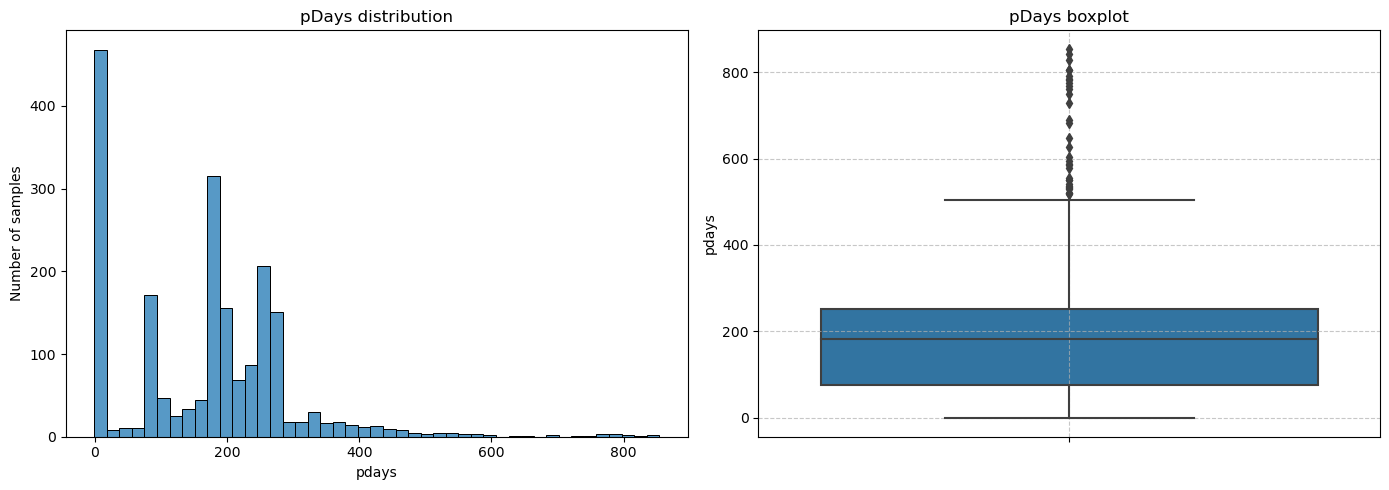

In [60]:
# pDays distribution, let's plot the histogram and box plot side-by-side
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
# I am using the square root of the total number of data points to calculate the number of bins
# (square root of 2000 = 45)
sns.histplot(data=df_t2, x='pdays', bins=45, kde=False, ax=ax[0])
ax[0].set_title('pDays distribution')
ax[0].set_ylabel('Number of samples')

sns.boxplot(y=df_t2['pdays'], ax=ax[1])
ax[1].set_title('pDays boxplot')
ax[1].grid(linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()



In [61]:
print(f'Minimum of pdays: {df_t2["pdays"].min()}')


Minimum of pdays: -1


In [62]:
# A new binary indicator for pdays - a new feature named contact_before
df_t2['contact_before'] = (df_t2['pdays'] != -1).astype(int)


In [63]:
# Updating the value of "-1" to "0"
df_t2['pdays'] = df_t2['pdays'].replace(-1, 0)


In [64]:
df_t2

,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed,age_bin,contact_before
0,technician,single,tertiary,no,392,yes,no,cellular,1,apr,957,2,131,2,failure,no,25-35,1
1,technician,divorced,secondary,no,688,yes,yes,cellular,1,apr,233,2,133,1,failure,no,35-45,1
2,retired,married,secondary,no,1035,yes,yes,cellular,1,apr,126,2,239,1,failure,no,55-65,1
3,blue-collar,married,secondary,no,398,yes,yes,cellular,1,apr,274,1,238,2,failure,no,45-55,1
4,retired,married,secondary,no,1004,yes,no,cellular,1,apr,479,1,307,1,failure,no,45-55,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,student,single,secondary,no,2785,no,no,cellular,16,sep,327,2,0,0,other,yes,0-25,0
1996,admin.,single,secondary,no,127,no,no,cellular,16,sep,1334,2,0,0,other,yes,25-35,0
1997,retired,married,primary,no,1154,no,no,telephone,17,sep,231,1,0,0,other,yes,75+,0
1998,services,married,primary,no,4343,yes,no,unknown,20,sep,185,1,0,0,other,yes,45-55,0


<hr style="border:1px solid gray"> </hr>

### Encoding all categorical attributes as numerical

- First observation: there are no ID columns that should be considered for dropping.


#### Encoding ordinal categorical attributes

There are three ordinal categorical attributes:
- education (primary > secondary > tertiary)
- month (jan - dec)
- our new feature age_bin
<br>
<br>
Let's encode them:

In [65]:
# education mapper
education_mapper = {
    "primary": 1,
    "secondary": 2,
    "tertiary": 3
}

df_t2['education'] = df_t2['education'].replace(education_mapper)



In [66]:
# month mapper
month_mapper = {
    "jan": 1,
    "feb": 2,
    "mar": 3,
    "apr": 4,
    "may": 5,
    "jun": 6,
    "jul": 7,
    "aug": 8,
    "sep": 9,
    "oct": 10,
    "nov": 11,
    "dec": 12
}

df_t2['month'] = df_t2['month'].replace(month_mapper)



In [67]:
# age_bin - I am going to use the OrdinalEncoder instead
age_bin_encoder = OrdinalEncoder(categories=[age_bin_labels])
df_t2.age_bin = age_bin_encoder.fit_transform(df_t2.age_bin.values.reshape(-1, 1))



Let's look at data now:
<br>
<br>

In [68]:
df_t2

,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed,age_bin,contact_before
0,technician,single,3,no,392,yes,no,cellular,1,4,957,2,131,2,failure,no,1.0,1
1,technician,divorced,2,no,688,yes,yes,cellular,1,4,233,2,133,1,failure,no,2.0,1
2,retired,married,2,no,1035,yes,yes,cellular,1,4,126,2,239,1,failure,no,4.0,1
3,blue-collar,married,2,no,398,yes,yes,cellular,1,4,274,1,238,2,failure,no,3.0,1
4,retired,married,2,no,1004,yes,no,cellular,1,4,479,1,307,1,failure,no,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,student,single,2,no,2785,no,no,cellular,16,9,327,2,0,0,other,yes,0.0,0
1996,admin.,single,2,no,127,no,no,cellular,16,9,1334,2,0,0,other,yes,1.0,0
1997,retired,married,1,no,1154,no,no,telephone,17,9,231,1,0,0,other,yes,6.0,0
1998,services,married,1,no,4343,yes,no,unknown,20,9,185,1,0,0,other,yes,3.0,0


#### Encoding nominal categorical attributes

There are several nominal categorical attributes: job, marital, housing, loan, poutcome, subscribed
<br>
<br>
Let's one-hot encode them using dummies. I was thinking about using the pure one-hot encoder but it creates unnecessary redundant values.
<br>
<br>

In [69]:
# Categorical attributes
# categ_attrs = ['job','marital','default','housing','loan','poutcome','subscribed']
df_t2 = pd.get_dummies(df_t2, drop_first=True)



And finally let's look at our preprocessed dataframe:

In [70]:
df_t2.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   education          2000 non-null   int64  
 1   balance            2000 non-null   int64  
 2   day                2000 non-null   int64  
 3   month              2000 non-null   int64  
 4   duration           2000 non-null   int64  
 5   campaign           2000 non-null   int64  
 6   pdays              2000 non-null   int64  
 7   previous           2000 non-null   int64  
 8   age_bin            2000 non-null   float64
 9   contact_before     2000 non-null   int32  
 10  job_blue-collar    2000 non-null   uint8  
 11  job_entrepreneur   2000 non-null   uint8  
 12  job_housemaid      2000 non-null   uint8  
 13  job_management     2000 non-null   uint8  
 14  job_retired        2000 non-null   uint8  
 15  job_self-employed  2000 non-null   uint8  
 16  job_services       2000 

Ok, we have no missing values and dummies have created new extra fields, as expected.

<hr style="border:1px solid gray"> </hr>

### Rescaling features

Many ML algorithms assume that all numerical features are on the same scale. The two common approaches to bringing different features onto the same scale are **normalization** and **standardization**. Normalization (also called Min max Scaling) is implemented in Python using MinMaxScaler and the standardization (also known as Standard Scaling) is implemented using StandardScaler. Then we can also use another approach called **robust scaling**:

- MinMaxScaler - rescales a column to the interval [0,1]
- StandardScaler - rescales a numerical column so that it has mean 0 and standard deviation 1.
- RobustScaler - it does a better job in the presence of outliers (we observed outliers in column balance)
<br>
<br>

In theory, the guidelines are:

**Advantages:**

- Standardization: scales features such that the distribution is centered around 0, with a standard deviation of 1.
- Normalization: shrinks the range such that the range is now between 0 and 1 (or -1 to 1 if there are negative values).
- Robust Scaler: similar to normalization but it instead uses the interquartile range, so that it is robust to outliers.

**Disadvantages:**

- Standardization: not good if the data is not normally distributed (i.e. no Gaussian distribution)
- Normalization: get influenced heavily by outliers (i.e. extreme values)
- Robust Scaler: doesn't take the median into account and only focuses on the parts where the bulk data is
<br>
<br>
Let's have a quick look at the distribution of the attributes with presence of outliers: balance, campaign, previous, pdays:
<br>
<br>

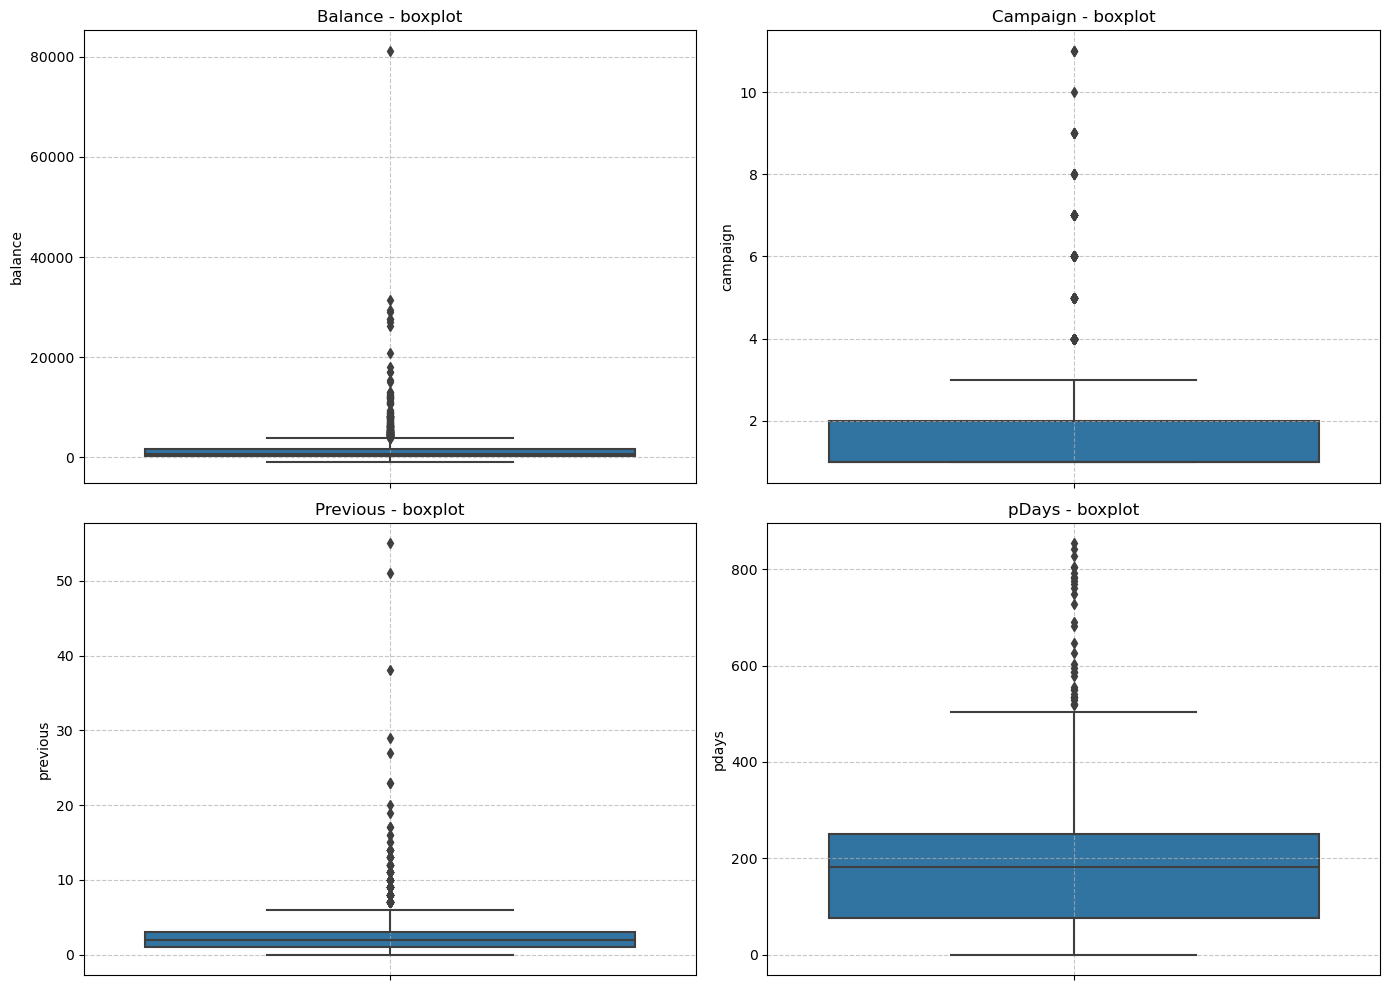

In [71]:
# Age distribution, let's plot the histogram and box plot side-by-side
fig, ax = plt.subplots(2, 2, figsize=(14, 10))
sns.boxplot(y=df_t2['balance'], ax=ax[0][0])
ax[0][0].set_title('Balance - boxplot')
ax[0][0].grid(linestyle='--', alpha=0.7)

sns.boxplot(y=df_t2['campaign'], ax=ax[0][1])
ax[0][1].set_title('Campaign - boxplot')
ax[0][1].grid(linestyle='--', alpha=0.7)

sns.boxplot(y=df_t2['previous'], ax=ax[1][0])
ax[1][0].set_title('Previous - boxplot')
ax[1][0].grid(linestyle='--', alpha=0.7)

sns.boxplot(y=df_t2['pdays'], ax=ax[1][1])
ax[1][1].set_title('pDays - boxplot')
ax[1][1].grid(linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


# sns.boxplot(y=df_t2['balance'])


As we can see, all four attributes have outliers.

Based on the above, I am going to rescale data as follows:
- **balance, campaign, previous, pdays, duration - RobustScaler** (due to outliers)
- **day, month - Normalization using StandardScaler** (or we can just divide data with a constant)
<br>
<br>

In [72]:
# Robust scaling - balance, campaign
robust_scaler = RobustScaler()
df_t2[['balance','campaign']] = robust_scaler.fit_transform(df_t2[['balance', 'campaign']])
df_t2[['previous','pdays','duration']] = robust_scaler.fit_transform(df_t2[['previous', 'pdays', 'duration']])


In [73]:
# Standard scaling - day, month, day_of_year, previous
std_scaler = StandardScaler()
df_t2[['day', 'month']] = std_scaler.fit_transform(df_t2[['day', 'month']])



In [74]:
df_t2

,education,balance,day,month,duration,campaign,pdays,previous,age_bin,contact_before,...,marital_married,marital_single,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,subscribed_yes
0,3,-0.110187,-1.323565,-0.325571,3.094421,1.0,-0.291013,0.0,1.0,1,...,0,1,0,1,0,0,0,0,0,0
1,2,0.094941,-1.323565,-0.325571,-0.012876,1.0,-0.279601,-0.5,2.0,1,...,0,0,0,1,1,0,0,0,0,0
2,2,0.335412,-1.323565,-0.325571,-0.472103,1.0,0.325250,-0.5,4.0,1,...,1,0,0,1,1,0,0,0,0,0
3,2,-0.106029,-1.323565,-0.325571,0.163090,0.0,0.319544,0.0,3.0,1,...,1,0,0,1,1,0,0,0,0,0
4,2,0.313929,-1.323565,-0.325571,1.042918,0.0,0.713267,-0.5,3.0,1,...,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2,1.548164,0.221272,1.298225,0.390558,1.0,-1.038516,-1.0,0.0,0,...,0,1,0,0,0,0,0,1,0,1
1996,2,-0.293832,0.221272,1.298225,4.712446,1.0,-1.038516,-1.0,1.0,0,...,0,1,0,0,0,0,0,1,0,1
1997,1,0.417879,0.324261,1.298225,-0.021459,0.0,-1.038516,-1.0,6.0,0,...,1,0,0,0,0,1,0,1,0,1
1998,1,2.627859,0.633229,1.298225,-0.218884,0.0,-1.038516,-1.0,3.0,0,...,1,0,0,1,0,0,1,1,0,1


#### Cyclical features

There are two obvious picks for cyclical features: **month** and **day**. Eventually we can also add another feature: **day of year**. Let's do this:
<br>
<br>

In [75]:
# Cyclical features
# Month
# Encode month using sine and cosine transformations
df_t2['month_sin'] = np.sin(2 * np.pi * df_t2['month'] / 12)
df_t2['month_cos'] = np.cos(2 * np.pi * df_t2['month'] / 12)

# Day
# Encode day of month using sine and cosine transformations
df_t2['day_of_month_sin'] = np.sin(2 * np.pi * df_t2['day'] / 31)
df_t2['day_of_month_cos'] = np.cos(2 * np.pi * df_t2['day'] / 31)



In [76]:
###########################
# Day of year - new feature
# Combine 'month' and 'day_of_month' to represent day of year
# Cumulative sum of days up to the current month
cumulative_days = [0, 31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334]

# Function to calculate day of the year
def calculate_day_of_year(row):
    month = row['month']
    day = row['day']
    return day + cumulative_days[int(month-1)]

# Apply the function to each row
df_t2['day_of_year'] = df_t2.apply(calculate_day_of_year, axis=1)

# Encode day of year using sine and cosine transformations
df_t2['day_of_year_sin'] = np.sin(2 * np.pi * df_t2['day_of_year'] / 365)
df_t2['day_of_year_cos'] = np.cos(2 * np.pi * df_t2['day_of_year'] / 365)

# Drop the intermediate 'day_of_year' column
df_t2.drop(columns=['day_of_year'], inplace=True)

# Drop the original 'month' column? Nik said in the QA session that the original data should be deleted.
df_t2.drop(columns=['month'], inplace=True)

# Drop the original 'day_of_month' column
df_t2.drop(columns=['day'], inplace=True)



In [77]:
df_t2.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   education          2000 non-null   int64  
 1   balance            2000 non-null   float64
 2   duration           2000 non-null   float64
 3   campaign           2000 non-null   float64
 4   pdays              2000 non-null   float64
 5   previous           2000 non-null   float64
 6   age_bin            2000 non-null   float64
 7   contact_before     2000 non-null   int32  
 8   job_blue-collar    2000 non-null   uint8  
 9   job_entrepreneur   2000 non-null   uint8  
 10  job_housemaid      2000 non-null   uint8  
 11  job_management     2000 non-null   uint8  
 12  job_retired        2000 non-null   uint8  
 13  job_self-employed  2000 non-null   uint8  
 14  job_services       2000 non-null   uint8  
 15  job_student        2000 non-null   uint8  
 16  job_technician     2000 

In [78]:
df_t2

,education,balance,duration,campaign,pdays,previous,age_bin,contact_before,job_blue-collar,job_entrepreneur,...,contact_unknown,poutcome_other,poutcome_success,subscribed_yes,month_sin,month_cos,day_of_month_sin,day_of_month_cos,day_of_year_sin,day_of_year_cos
0,3,-0.110187,3.094421,1.0,-0.291013,0.0,1.0,1,0,0,...,0,0,0,0,-0.169644,0.985505,-0.265059,0.964232,-0.528153,0.849149
1,2,0.094941,-0.012876,1.0,-0.279601,-0.5,2.0,1,0,0,...,0,0,0,0,-0.169644,0.985505,-0.265059,0.964232,-0.528153,0.849149
2,2,0.335412,-0.472103,1.0,0.325250,-0.5,4.0,1,0,0,...,0,0,0,0,-0.169644,0.985505,-0.265059,0.964232,-0.528153,0.849149
3,2,-0.106029,0.163090,0.0,0.319544,0.0,3.0,1,1,0,...,0,0,0,0,-0.169644,0.985505,-0.265059,0.964232,-0.528153,0.849149
4,2,0.313929,1.042918,0.0,0.713267,-0.5,3.0,1,0,0,...,0,0,0,0,-0.169644,0.985505,-0.265059,0.964232,-0.528153,0.849149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2,1.548164,0.390558,1.0,-1.038516,-1.0,0.0,0,0,0,...,0,1,0,1,0.628598,0.777730,0.044833,0.998994,0.003809,0.999993
1996,2,-0.293832,4.712446,1.0,-1.038516,-1.0,1.0,0,0,0,...,0,1,0,1,0.628598,0.777730,0.044833,0.998994,0.003809,0.999993
1997,1,0.417879,-0.021459,0.0,-1.038516,-1.0,6.0,0,0,0,...,0,1,0,1,0.628598,0.777730,0.065675,0.997841,0.005582,0.999984
1998,1,2.627859,-0.218884,0.0,-1.038516,-1.0,3.0,0,0,0,...,1,1,0,1,0.628598,0.777730,0.127993,0.991775,0.010900,0.999941


<hr style="border:1px solid gray"> </hr>

### Treatment of outliers

In the previous section we observed that 'balance', 'pdays', 'previous', 'campaign' contain some extreme values. All other columns do not have outliers - except for duration but this attribute would be dropped if we were making a model so I am excluding duration from treatment in this section. Also, we don't have to deal with the "age" attribute because we have "discretized" it.
<br>
<br>
Let's take a look at their histograms after we have rescaled them:
<br>
<br>

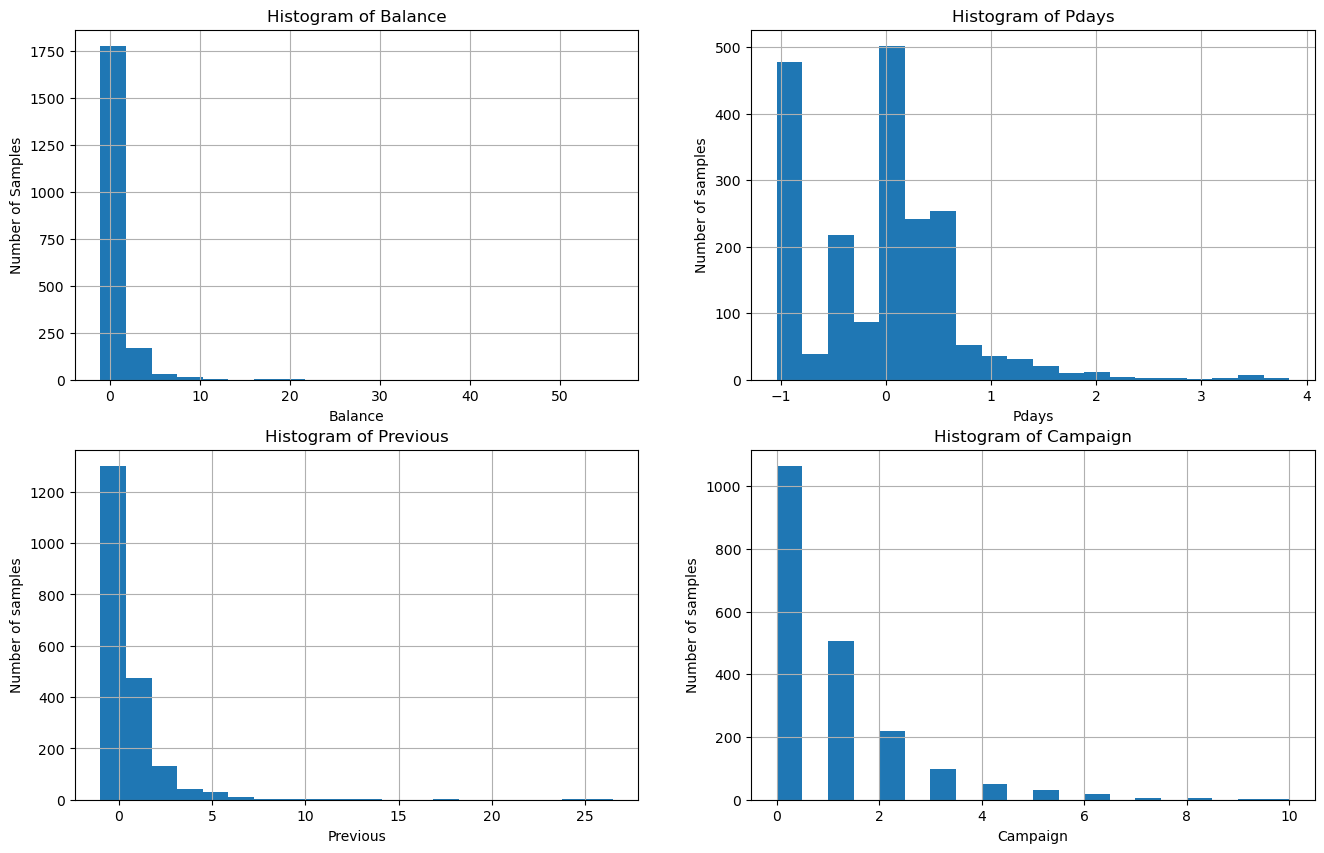

In [79]:
# Create figure with four subplots
fig = plt.figure(figsize=(16,10))

# Plot balance
ax1 = fig.add_subplot(2, 2, 1)
ax1.set_title("Histogram of Balance")
ax1.set_xlabel('Balance')
ax1.set_ylabel('Number of Samples')
df_t2['balance'].hist(bins=20)

# Plot pdays
ax2 = fig.add_subplot(2, 2, 2)
ax2.set_title("Histogram of Pdays")
ax2.set_xlabel('Pdays')
ax2.set_ylabel('Number of samples')
df_t2['pdays'].hist(bins=20)

# Plot previous
ax3 = fig.add_subplot(2, 2, 3)
ax3.set_title("Histogram of Previous")
ax3.set_xlabel('Previous')
ax3.set_ylabel('Number of samples')
df_t2['previous'].hist(bins=20)

# Plot campaign
ax4 = fig.add_subplot(2, 2, 4)
ax4.set_title("Histogram of Campaign")
ax4.set_xlabel('Campaign')
ax4.set_ylabel('Number of samples')
df_t2['campaign'].hist(bins=20)

plt.show()


All histograms are still skewed to the left with a long tail, which is not ideal. Since the extreme values are practically possible in all those columns and they are not a product of a wrong entry or another anomaly, instead of ignoring the data rows with extreme values we can transform them to diminish the negative impact of outliers to ML models. A typical way to do this is to apply a log transformation. However, we may have negative values in the attributes after rescaling, let's check it out:
<br>

In [80]:
print(f'Minimum of pdays: {df_t2["pdays"].min()}')
print(f'Minimum of campaign: {df_t2["campaign"].min()}')
print(f'Minimum of previous: {df_t2["previous"].min()}')
print(f'Minimum of balance: {df_t2["balance"].min()}')



Minimum of pdays: -1.0385164051355207
Minimum of campaign: 0.0
Minimum of previous: -1.0
Minimum of balance: -1.060984060984061


There are negative values in all columns except for campaign. We need to add a constant to those negative values in order to shift them to a positive range before applying a log transformation.

As per the provided example, I am choosing to shift the values of pdays, previous and balance to the interval $[1, +\infty]$ before applying a log transformation. To avoid negative infinity in the attribute campaign (for campaign = 0), I will also shift it by adding "1" to data before applying the transformation:
<br>

In [81]:
# Use a log transformation to decrease the impact of outliers
df_t2['balance'] = np.log(df_t2['balance'] + abs(min(df_t2['balance'])) + 1)
df_t2['pdays'] = np.log(df_t2['pdays'] + abs(min(df_t2['pdays'])) + 1)
df_t2['previous'] = np.log(df_t2['previous'] + abs(min(df_t2['previous'])) + 1)
df_t2['campaign'] = np.log(df_t2['campaign'] + 1)



And let's look at the distribution again:
<br>

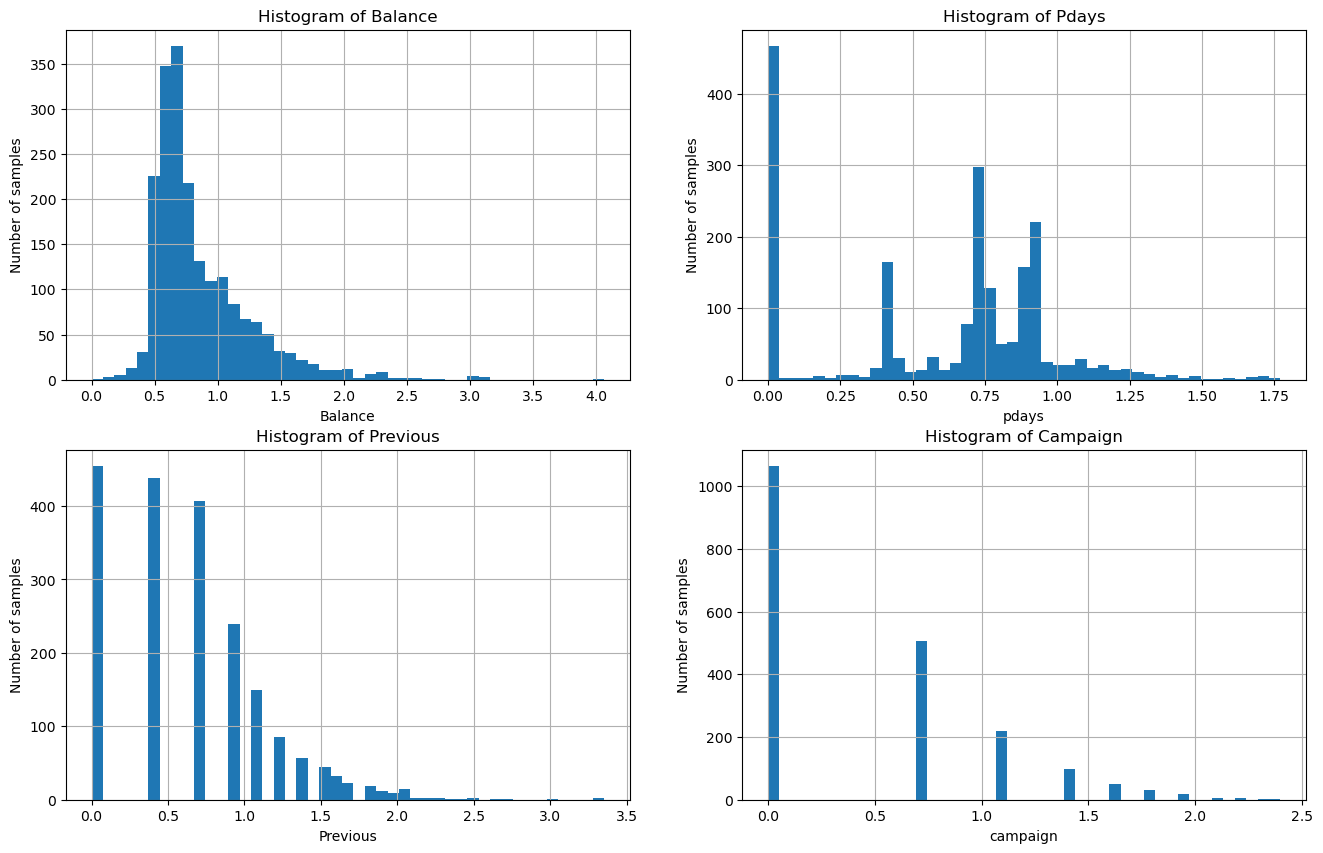

In [82]:
# Create figure with two subplots
fig = plt.figure(figsize=(16,10))

# Plot balance
ax1 = fig.add_subplot(2, 2, 1)
ax1.set_title("Histogram of Balance")
ax1.set_xlabel('Balance')
ax1.set_ylabel('Number of samples')
df_t2['balance'].hist(bins=45)

# Plot pdays
ax2 = fig.add_subplot(2, 2, 2)
ax2.set_title("Histogram of Pdays")
ax2.set_xlabel('pdays')
ax2.set_ylabel('Number of samples')
df_t2['pdays'].hist(bins=45)

# Plot previous
ax3 = fig.add_subplot(2, 2, 3)
ax3.set_title("Histogram of Previous")
ax3.set_xlabel('Previous')
ax3.set_ylabel('Number of samples')
df_t2['previous'].hist(bins=45)

# Plot campaign
ax4 = fig.add_subplot(2, 2, 4)
ax4.set_title("Histogram of Campaign")
ax4.set_xlabel('campaign')
ax4.set_ylabel('Number of samples')
df_t2['campaign'].hist(bins=45)

plt.show()



As we can see, the balance histogram has improved and resembles a Gaussian-like distribution, good. Previous and campaign outliers have been scaled down, good.
<br>
<br>
**Issue with pdays**
<br>
As we can see from the distribution, the histogram for pdays is also Gaussian after our transformation. But that original value of "-1" which has been rescaled and transformed is still distorting. Due to my lack of experience, I am not sure what I can do here. There are 454 samples with that value so we can't afford to delete those samples and, in fact, it itself IS information. Also, many machine learning algorithms do not support data with missing values. So handling missing data is important for accurate data analysis and building robust models. I suppose there are several options:
<br>
- **Removing**: I have created an additional binary feature in task 2 which is basically a flag that tells us whether the contact has been made before or not. But can I update those "-1" values with a different value, for example with a mean? If we used the new binary feature together with the pdays attribute, could this be a good solution?
<br>
- **Winsorization**: this involves replacing extreme values (in this case, "-1") with less extreme values, often the nearest non-outlier value. This approach can help preserve the overall shape of the distribution while reducing the impact of outliers. But that could skew our model.
<br>
- **Different power transformation**: During my experiments, I used the **boxcox power transform** with lambda=0 (which is basically log transform) but the final distributions were same. I did not expriment with any other lambda values.
<br>
- Use a **model-based approach**: I suppose we will get to this in the next Etivities.
<br>
<br>

For now, although I am well aware of this issue, I am leaving the transformed attribute as it is because I could not find any relevant information on how to deal with this. Overall, **having a constant value with domain-specific meaning may not be inherently problematic**. It can be a valuable way to represent specific states in our data - which is the case for our dataset. We just have to be mindful of its potential impact on analysis.
<br>
<br>

Let's look at our correlation matrix now.
<br>
<br>

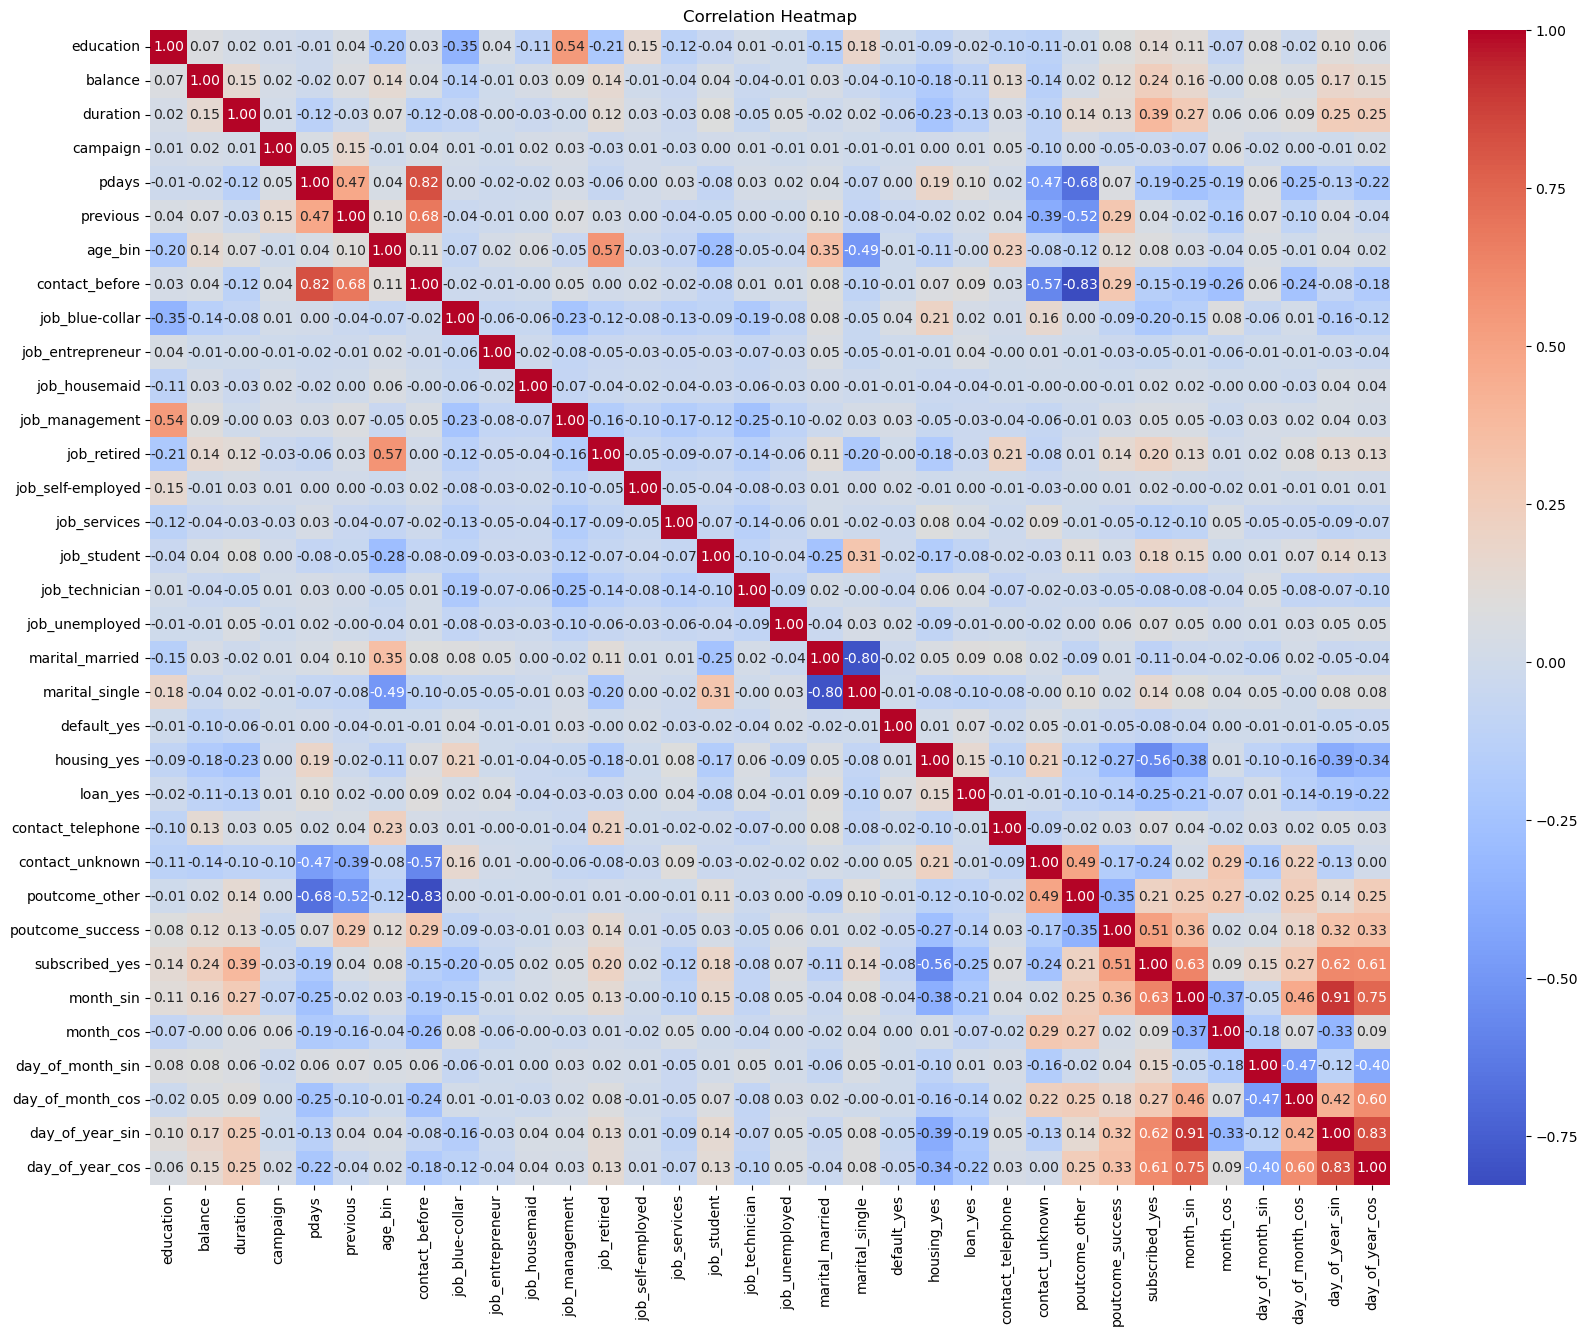

In [83]:
# Calculate the correlation matrix
corr_matrix = df_t2.corr()

# Plot the heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()



The correlation matrix above confirms those interesting correlations that we have seen before and gives us some new insights:
<br>
<br>
- **Positive correlations**
- job_management vs education -> very positive, managers need a good education, don't they?
- job_retired vs age_bin -> very positive, retired people are usually older
- marital_married vs age_bin -> positive (hmm...)
- subscribed_yes vs month -> very positive and confirming our previous finding that summer is 100% successful when contacting clients
- contact_before vs pdays -> very positive (and obviously expected)
- poutcome_yes vs subscribed_yes -> very positive (previously subscribed clients are more inclined to subscribe again)
- subscribed_yes vs duration -> but this is irrelevant due to the description of the duration attribute
<br>
<br>
I am surprised that there is only 0.20 positive correlation between age_bin and subscribed_yes because I have found out that people over 60 usually subscribe to the deposit. But the reason could be that the new feature age_bin is defined as 45-55, 55-65, etc. and overlaps different subscription results. So this would be another area to explore in a real situation. 
<br>
<br>
- **Negative correlations**
- housing_yes vs subscribed_yes -> very negative (confirmation of another plot further up, people squeezed with a loan do not subscribe)
- age_bin vs job_student -> negative (perhaps just a proof that it works)
- marital_single vs job_student -> negative (and expected)
<br>
<br>


<hr style="border:2px solid gray">

## Conclusion

So, what actions should the bank consider, based on our observations, for the next marketing campaign?

1) Months of marketing activity: We saw that certain months are very successful. For the next marketing campaign, it will be wise for the bank to focus the marketing campaign during the months of June, July, August, September. Also, although February was the month with the highest activity, successful ratio was very low.
<br>
2) Age category: The next marketing campaign of the bank should target potential clients in their 20s or younger and 60s or older. Both categories had a very good chance of suscribing to a term deposit.
<br>
3) Job: Quite surprisingly (at least for me), potential clients that were students or retired were the most likely to suscribe to a term deposit. Retired individuals perhaps tend to have more term deposits in order to gain some cash through interest payments. Students were the other group that used to suscribe term deposits.
<br>
4) House loans: There is a very low success in subscribing for potential clients with a house loan. Perhaps, they have financial compromises to pay back its house loan and thus, there is no cash for them to suscribe to a term deposit account.
<br>
5) Education: Primary-educated clients at a higher age tend to subscribe more to the term deposit. This is a surprising outcome.
<br>
<br>

<hr style="border:2px solid gray">

## Reflection
 
This was again a very time consuming as well as a very enjoyable exercise. Even after reading all lessons and a lot of documentation I am still not sure how to tackle certain issues, namely long tail skewness or distorting constants in data. I guess we will get to know more in the next lessons.
<br>
<br>
One of the main questions for me was:
<br>
<br>
**How to analyse relationships between numerical and categorical attributes?**
<br>
<br>
The default Pearson correlation coefficient used for creating Seaborn heatmaps works well for numerical attributes, assuming a normal distribution. However, categorical attributes have to be encoded first to use the same. There are certain issues which I don't fully understand:

1) Encoding yes/no to a binary form 1/0: Can't assume normal distribution so the correlation coefficient might not accurately reflect the true relationship?

2) Mapping categorical variables to a numerical form (not one-hot): this works well but only for a small number of distinct values.
Trying to do this in our Etivity for the job attribute was not feasible. This can perhaps work for a small number of categories with a natural order. However, for nominal data, assigning numerical values creates artificial order and misrepresents the data.

3) One-hot encoding: this creates a plethora of extra binary features making heatmaps unwieldy for large datasets.
I guess the only way is to take those categorical attributes, 'assume' relationships, pick certain attributes, and perform a different type of analysis using different types of plots. I have played a bit with Chi-square test and Cramer's algorithm (see the Appendix) for categorical attributes, and that worked well. But I would like to know what's the correct way of analysis when we have a combination of numerical and categorical attributes.
<br>

<hr style="border:2px solid gray">

## Peers input:

The group was again not very active I would say. I used Phil Miesle's solution for categorical attributes description because it was more concise than mine. Then I also reflected on Josh's note that dropping the column "contact" might not be a good idea.
<br>
<br>

<hr style="border:2px solid gray">

### References

- Violin plots explanation:
<br>
https://www.labxchange.org/library/items/lb:LabXchange:46f64d7a:html:1
<br>
<br>
- Some interesting links:
<br>
https://stackoverflow.com/questions/55312548/create-a-heatmap-of-two-categorical-variables
<br>
https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9
<br>
https://www.kaggle.com/code/muhammetgamal5/categorical-variables-correlation-cramer-s-v
<br>
<br>

<hr style="border:2px solid gray">

## Appendix

Following up on my struggle on how to simply visualise correlations among numerical and categorical attributes, I have discovered that Cramer's V can be used for this purpose. Cramer's V is a measure of association used to quantify the strength of association between variables in a contingency table. It is an extension of Pearson's chi-squared test and is applicable when dealing with categorical data.
<br>
<br>
There is a **package named "dython"** that does all the Cramer's V job behind the scenes. To run the following, you will need to install the dython package.  
<br>
<br>

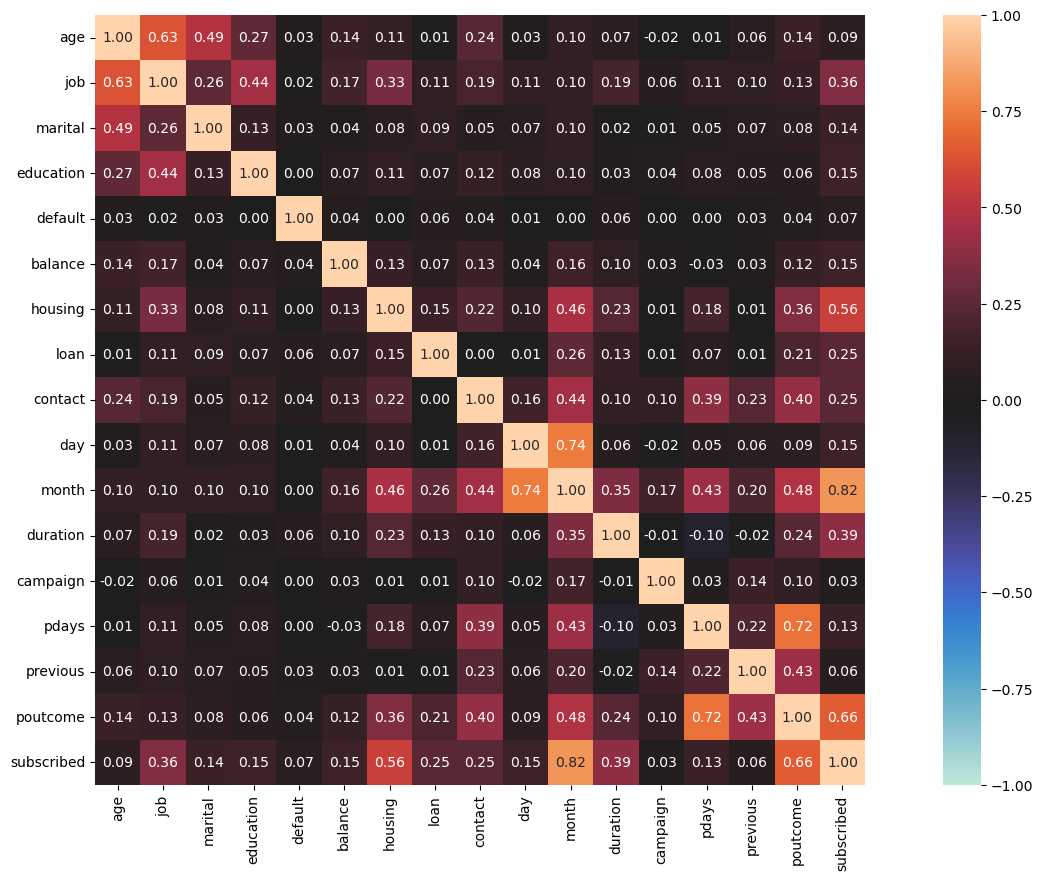

C:\Users\krol\AppData\Local\Temp\ipykernel_5316\2254525667.py:11: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df_complete_corr.dropna(axis=1, how='all').dropna(axis=0, how='all').style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
age,1.00,0.63,0.49,0.27,0.03,0.14,0.11,0.01,0.24,0.03,0.10,0.07,-0.02,0.01,0.06,0.14,0.09
job,0.63,1.00,0.26,0.44,0.02,0.17,0.33,0.11,0.19,0.11,0.10,0.19,0.06,0.11,0.10,0.13,0.36
marital,0.49,0.26,1.00,0.13,0.03,0.04,0.08,0.09,0.05,0.07,0.10,0.02,0.01,0.05,0.07,0.08,0.14
education,0.27,0.44,0.13,1.00,0.00,0.07,0.11,0.07,0.12,0.08,0.10,0.03,0.04,0.08,0.05,0.06,0.15
default,0.03,0.02,0.03,0.00,1.00,0.04,0.00,0.06,0.04,0.01,0.00,0.06,0.00,0.00,0.03,0.04,0.07
balance,0.14,0.17,0.04,0.07,0.04,1.00,0.13,0.07,0.13,0.04,0.16,0.10,0.03,-0.03,0.03,0.12,0.15
housing,0.11,0.33,0.08,0.11,0.00,0.13,1.00,0.15,0.22,0.10,0.46,0.23,0.01,0.18,0.01,0.36,0.56
loan,0.01,0.11,0.09,0.07,0.06,0.07,0.15,1.00,0.00,0.01,0.26,0.13,0.01,0.07,0.01,0.21,0.25
contact,0.24,0.19,0.05,0.12,0.04,0.13,0.22,0.00,1.00,0.16,0.44,0.10,0.10,0.39,0.23,0.40,0.25
day,0.03,0.11,0.07,0.08,0.01,0.04,0.10,0.01,0.16,1.00,0.74,0.06,-0.02,0.05,0.06,0.09,0.15


In [84]:
from dython.nominal import associations

df_cramer = pd.read_csv('bank.csv')

complete_correlation= associations(df_cramer, filename= 'complete_correlation.png', figsize=(20,10))

# Correlation matrix
df_complete_corr=complete_correlation['corr']

# Gradient heatmap
df_complete_corr.dropna(axis=1, how='all').dropna(axis=0, how='all').style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

